In [1]:
import sys
import os
sys.path.insert(0, os.path.join(os.getcwd(), '../core'))
import kaggle_support as kgs
import importlib
import matplotlib.pyplot as plt
import numpy as np
import cupy as cp
from dataclasses import dataclass, field, fields
import pack_cuda
import pack_vis
import pack_cost
import copy
import time
import pack_ga
from IPython.display import HTML, display, clear_output
pack_cuda.USE_FLOAT32 = True
pack_cuda._ensure_initialized()


local
local
stop final relax at some point


stop final relax at some point


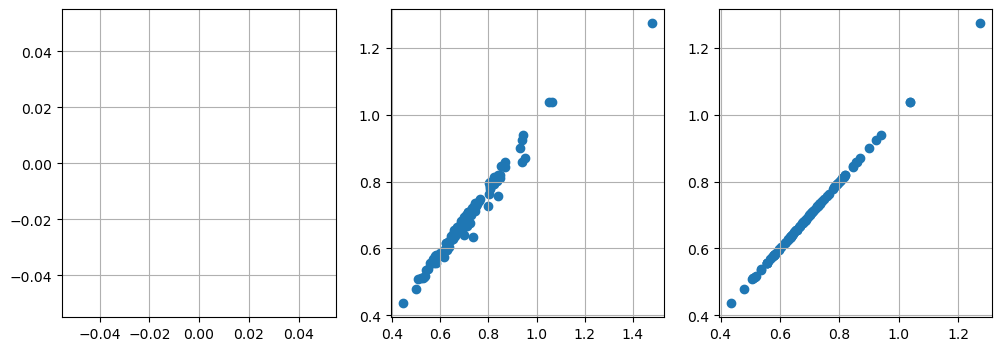

Generation 0, Trees 40, Best cost: 0.43591040, Est: 1.08977604, h: 6.602351


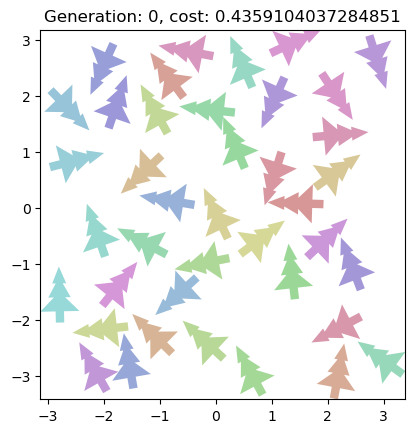

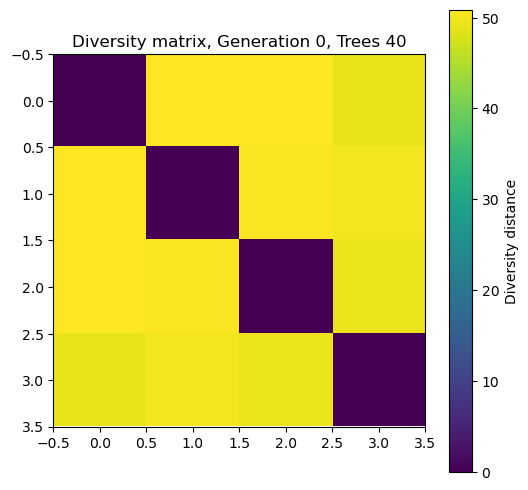

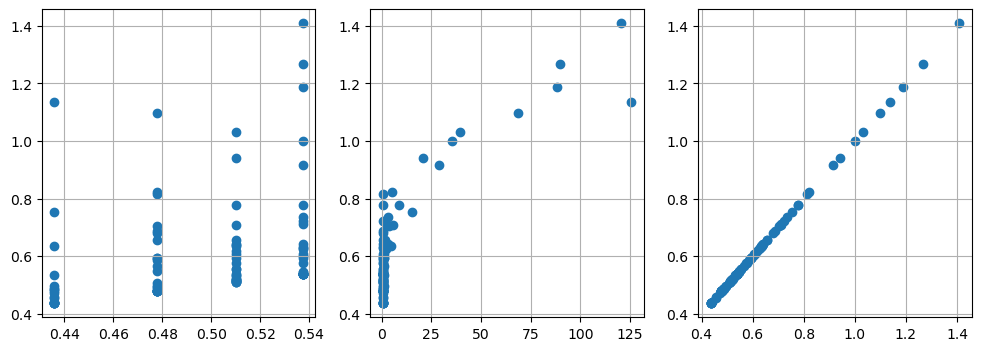

Generation 1, Trees 40, Best cost: 0.43591040, Est: 1.08977604, h: 6.602351


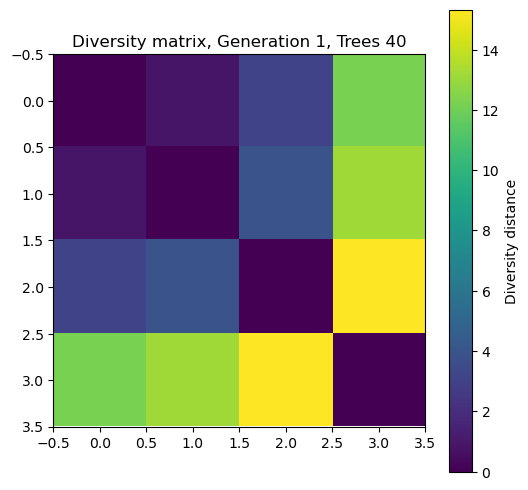

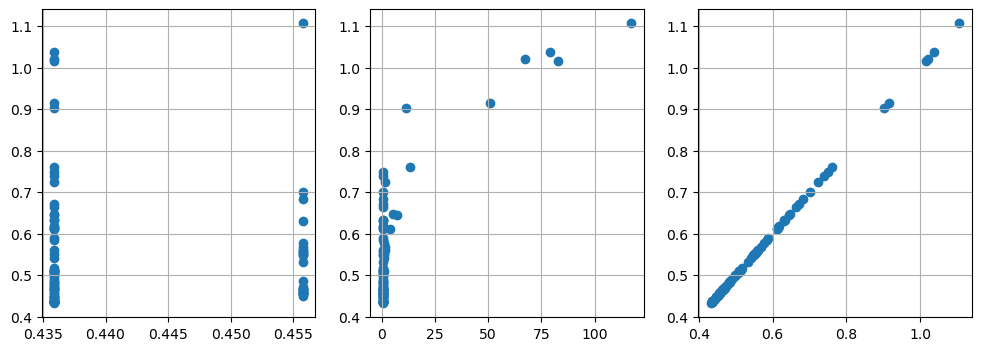

Generation 2, Trees 40, Best cost: 0.43243852, Est: 1.08109627, h: 6.576006


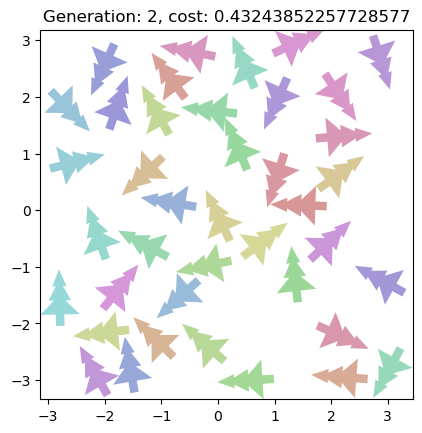

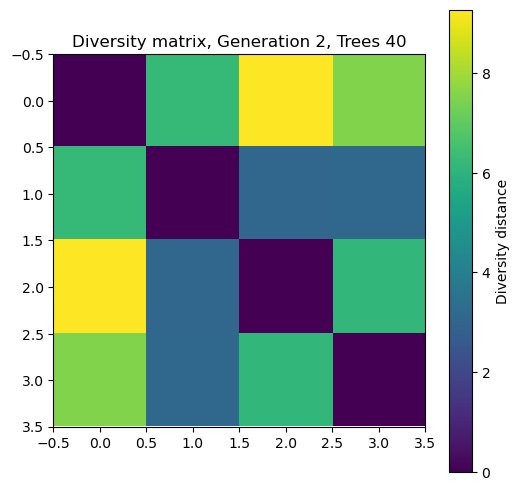

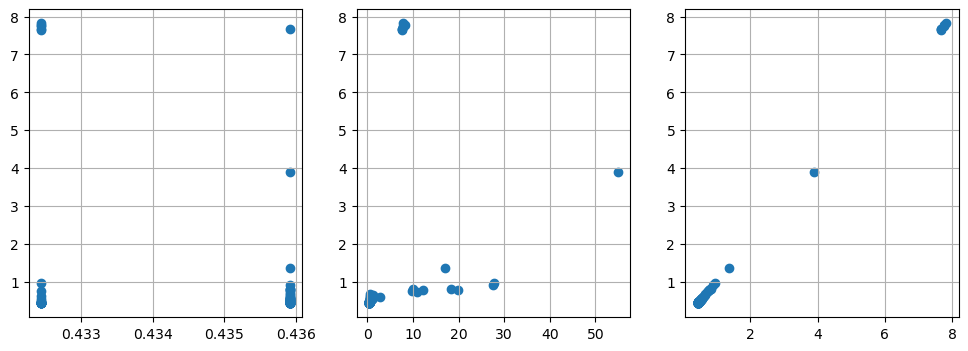

Generation 3, Trees 40, Best cost: 0.42614630, Est: 1.06536579, h: 6.527988


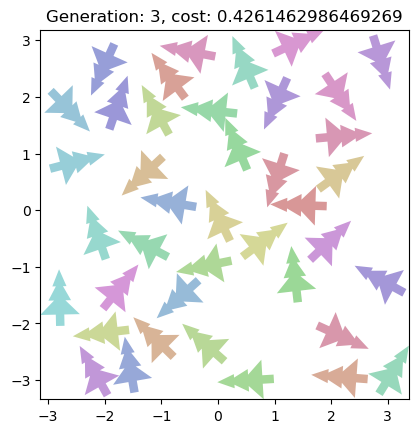

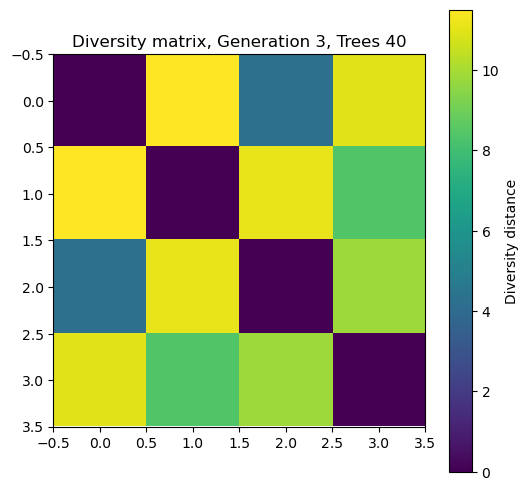

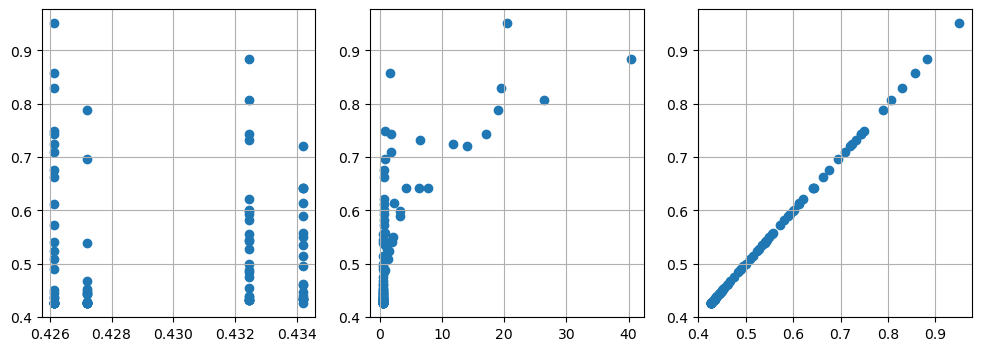

Generation 4, Trees 40, Best cost: 0.42614630, Est: 1.06536579, h: 6.527988


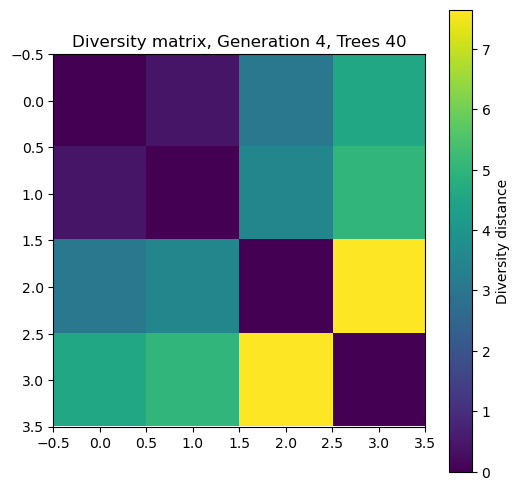

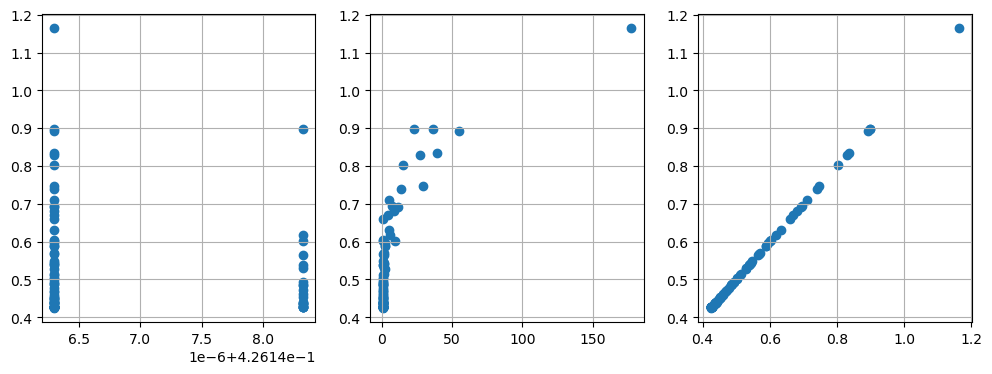

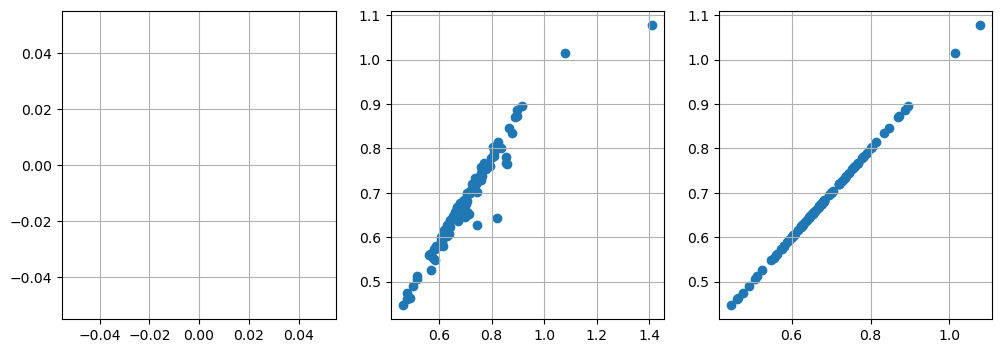

Generation 0, Trees 40, Best cost: 0.44686884, Est: 1.11717205, h: 6.684825


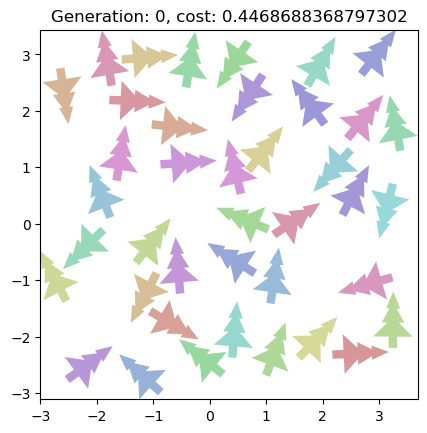

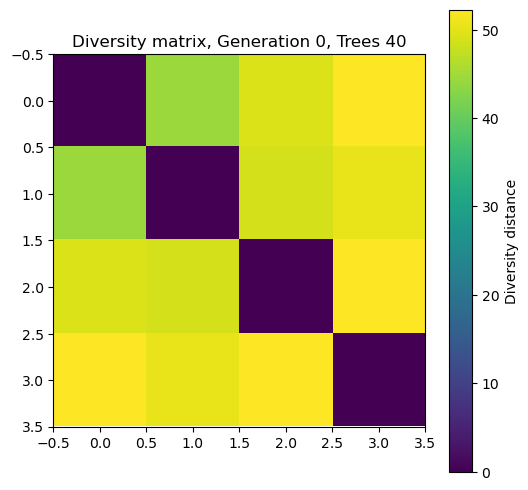

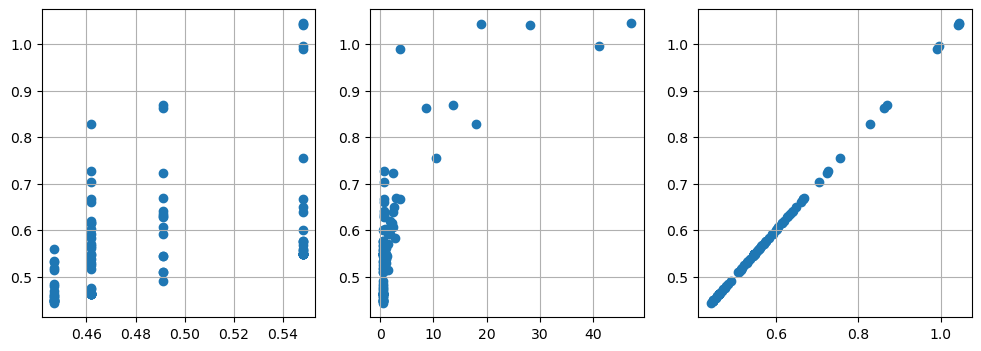

Generation 1, Trees 40, Best cost: 0.44261849, Est: 1.10654621, h: 6.652958


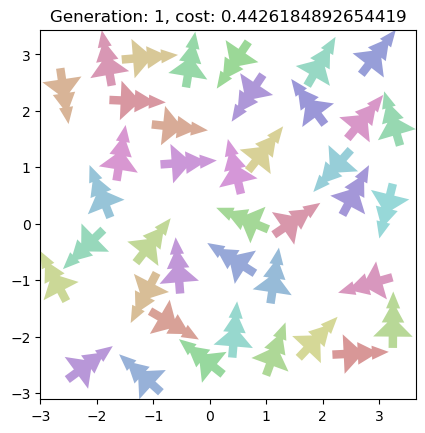

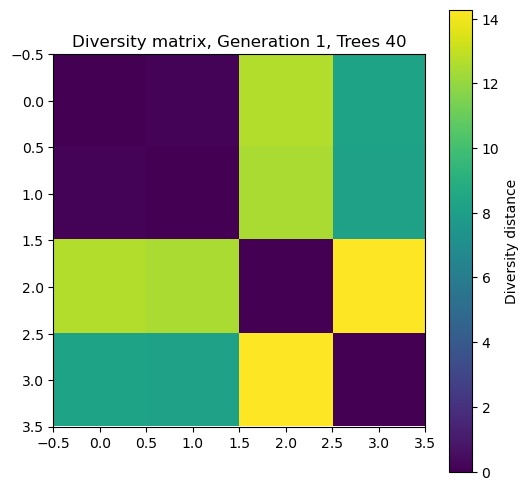

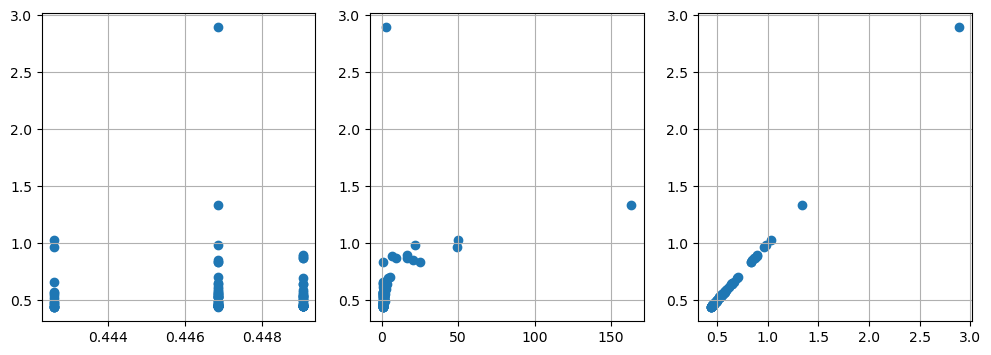

Generation 2, Trees 40, Best cost: 0.43934470, Est: 1.09836178, h: 6.628308


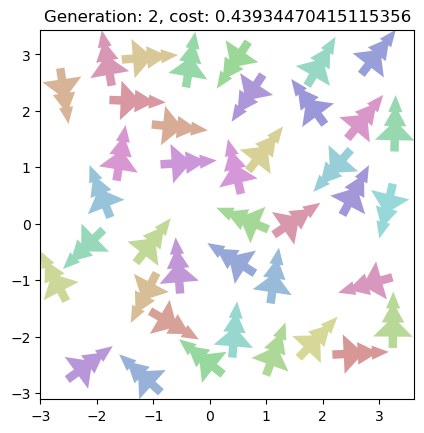

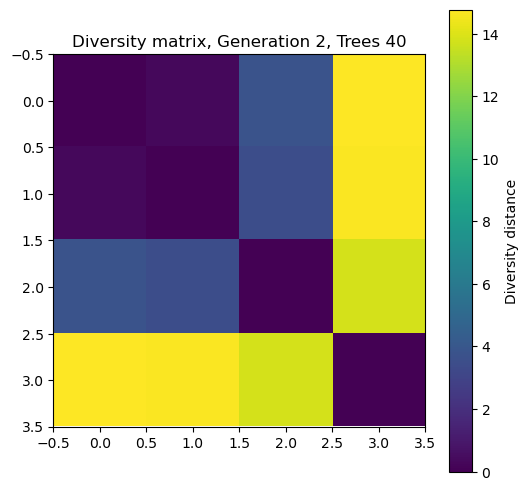

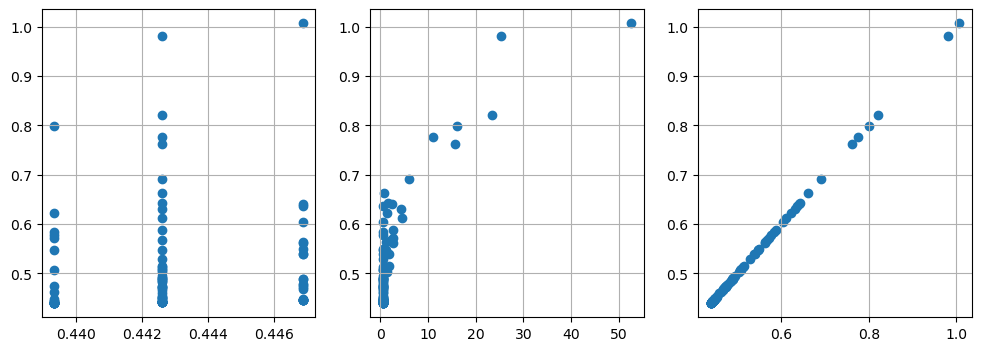

Generation 3, Trees 40, Best cost: 0.43934470, Est: 1.09836178, h: 6.628308


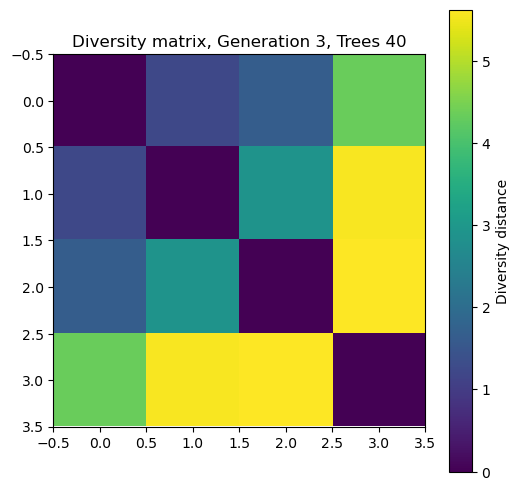

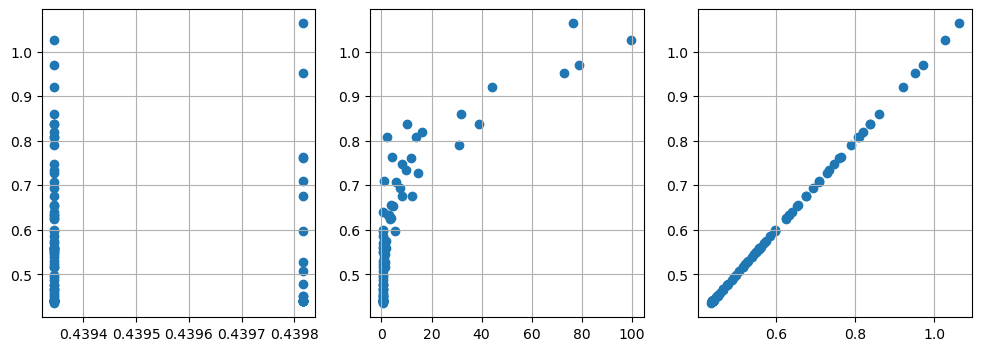

Generation 4, Trees 40, Best cost: 0.43518251, Est: 1.08795624, h: 6.596837


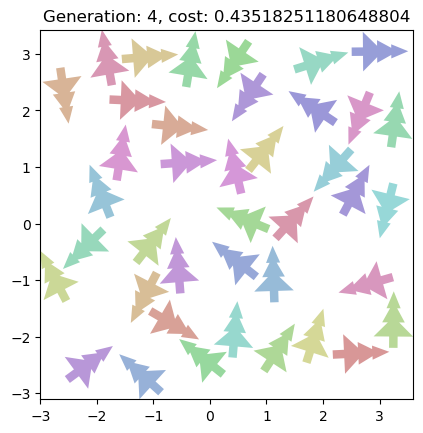

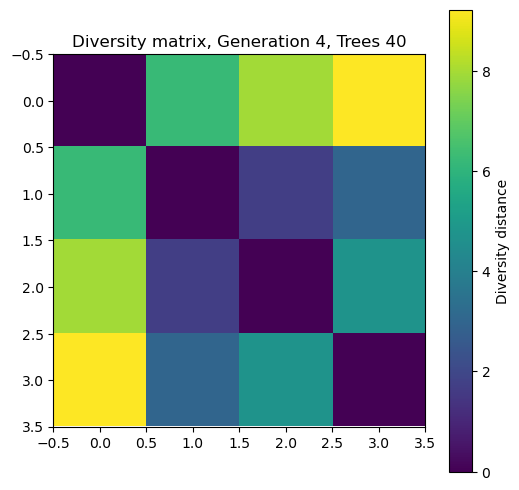

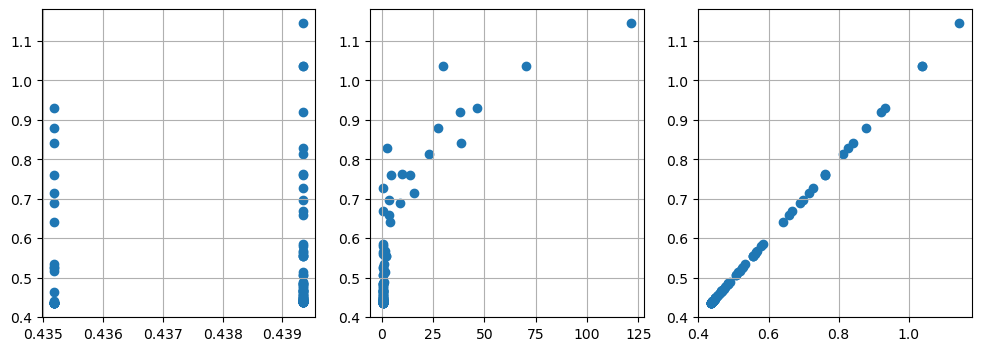

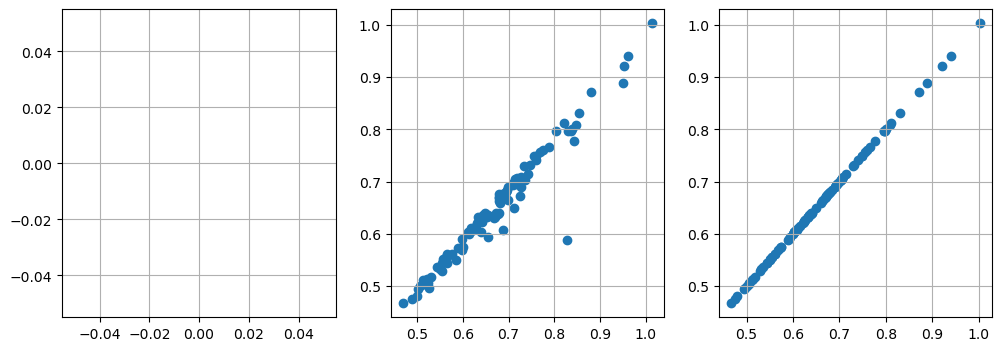

Generation 0, Trees 40, Best cost: 0.46713415, Est: 1.16783533, h: 6.834722


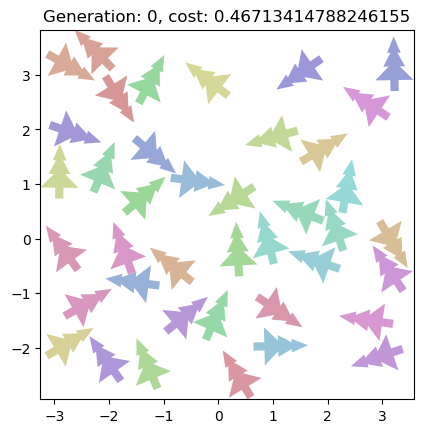

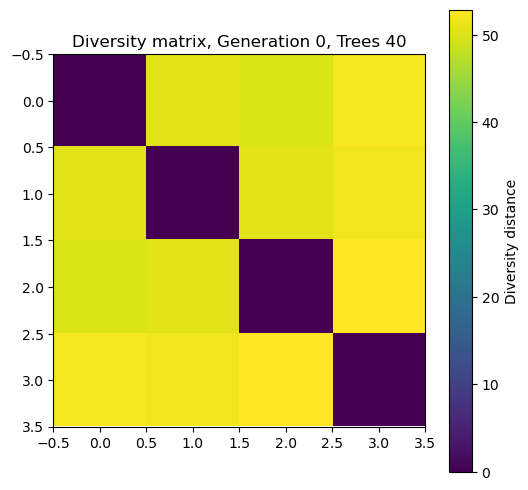

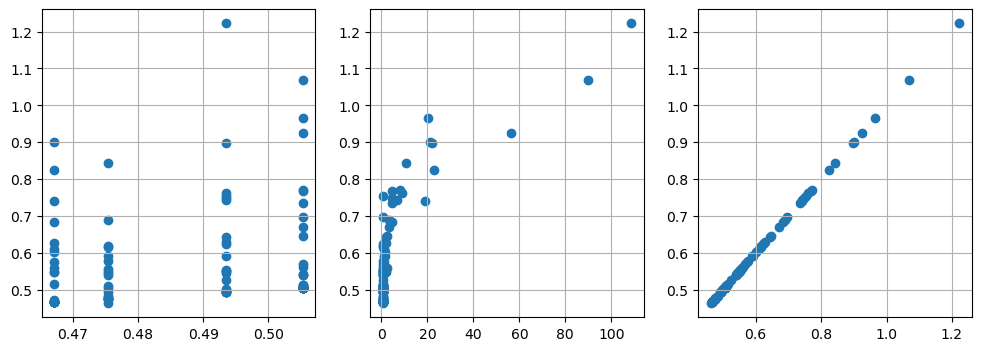

Generation 1, Trees 40, Best cost: 0.46307668, Est: 1.15769167, h: 6.802315


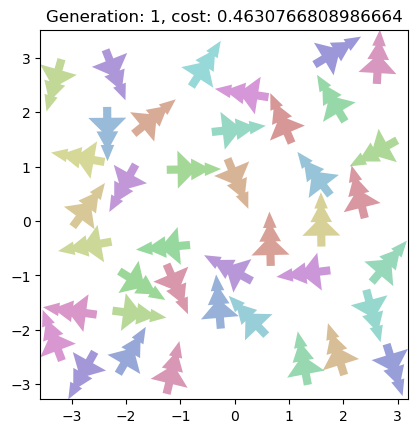

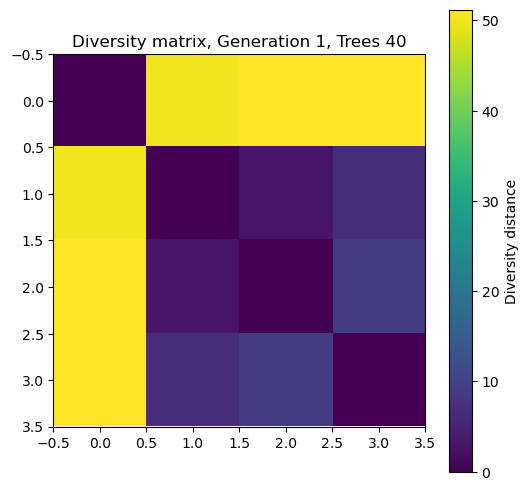

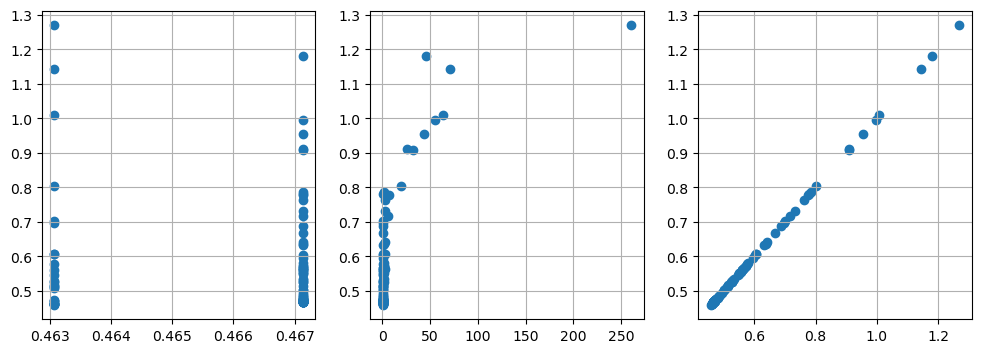

Generation 2, Trees 40, Best cost: 0.45837477, Est: 1.14593697, h: 6.767666


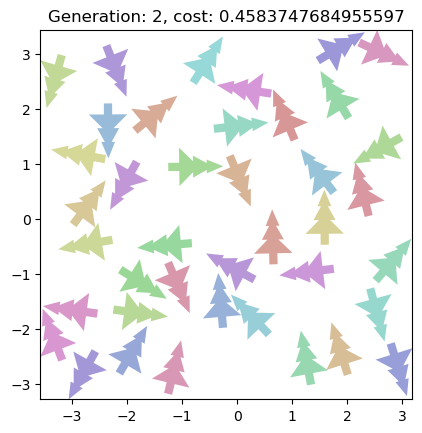

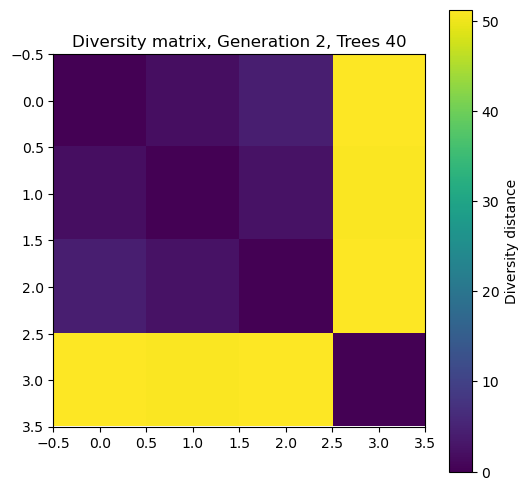

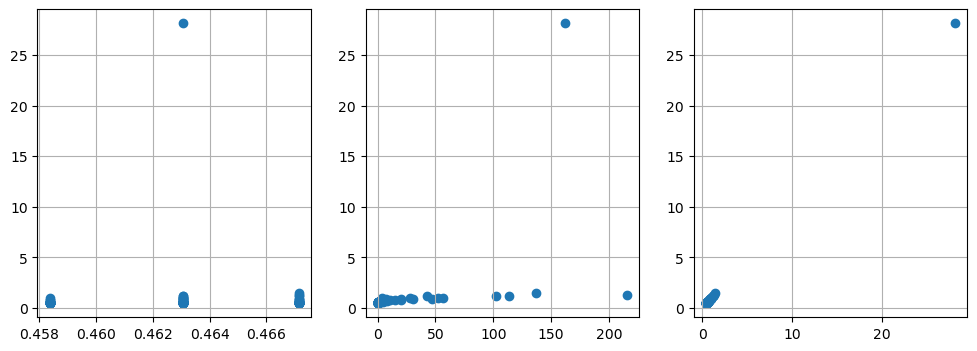

Generation 3, Trees 40, Best cost: 0.45837477, Est: 1.14593697, h: 6.767666


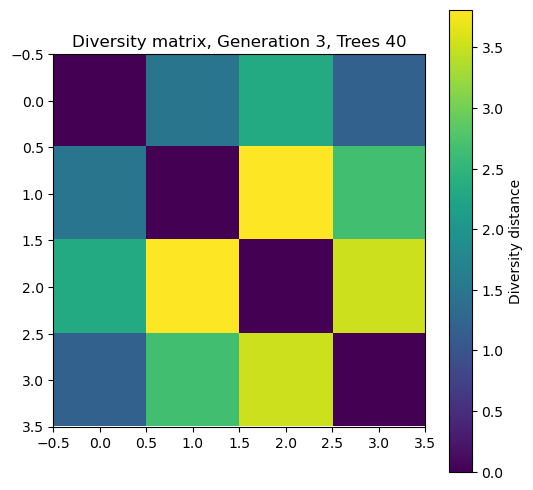

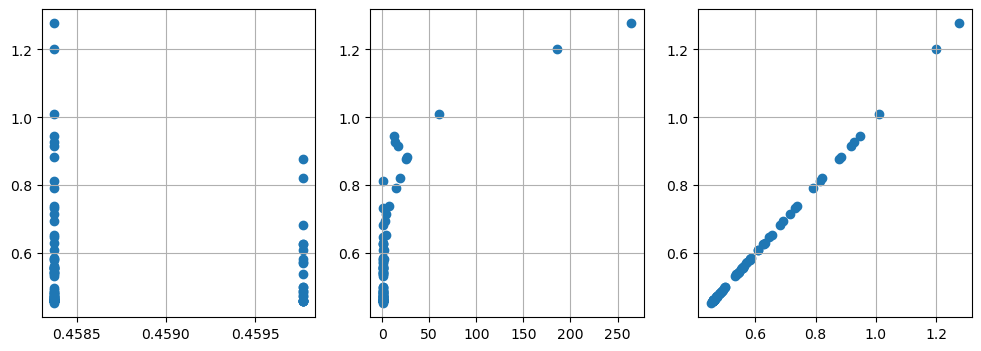

Generation 4, Trees 40, Best cost: 0.45197952, Est: 1.12994881, h: 6.721701


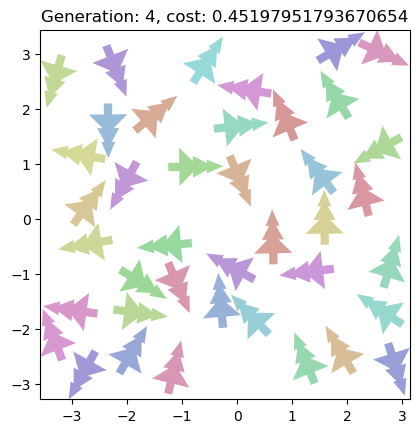

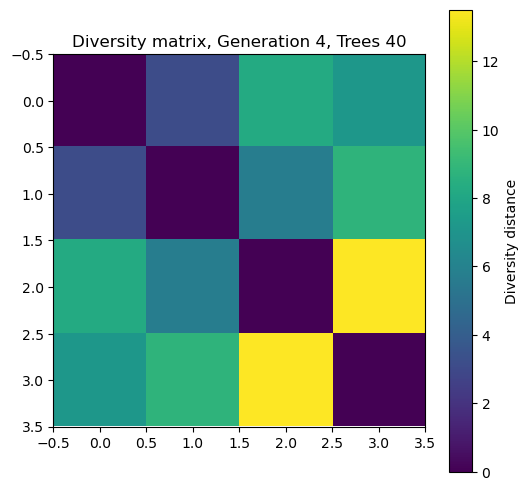

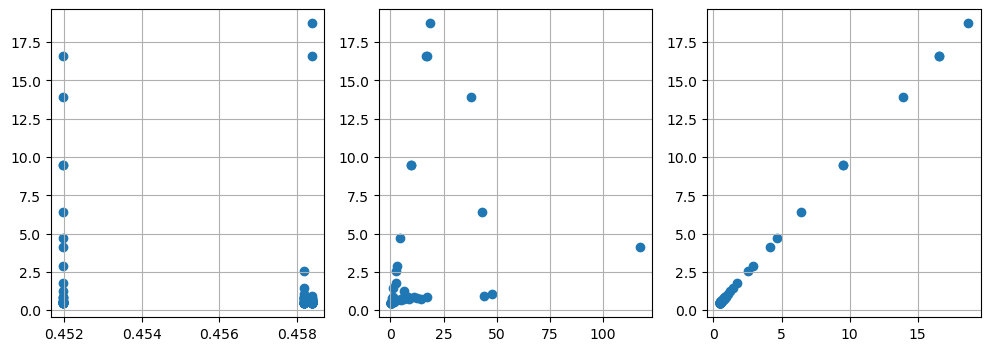

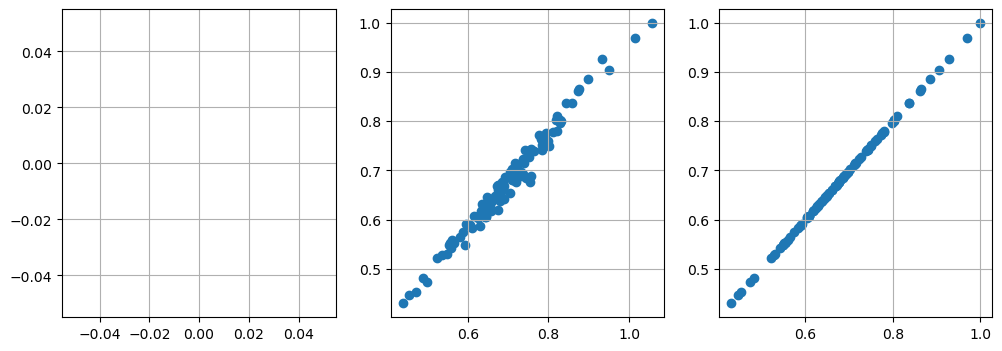

Generation 0, Trees 40, Best cost: 0.43016809, Est: 1.07542019, h: 6.558720


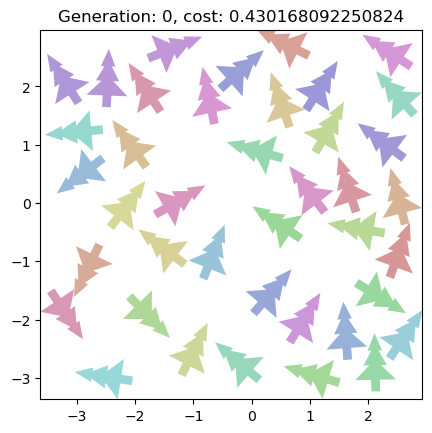

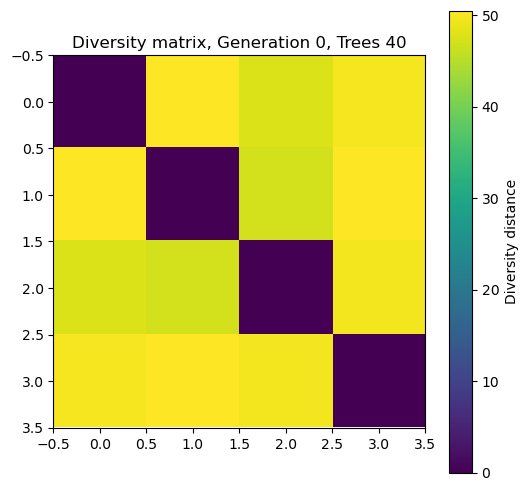

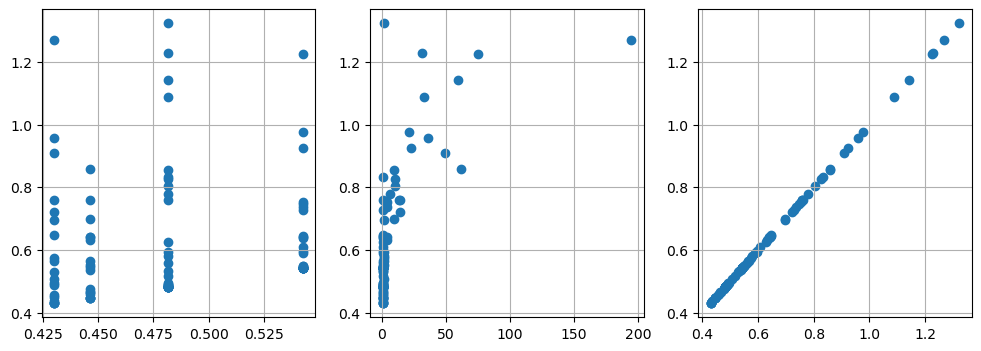

Generation 1, Trees 40, Best cost: 0.43016809, Est: 1.07542019, h: 6.558720


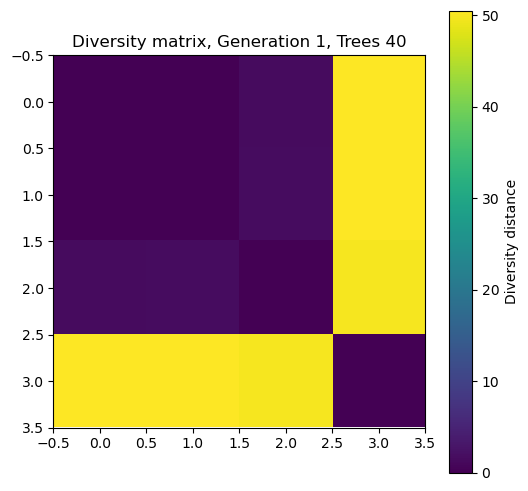

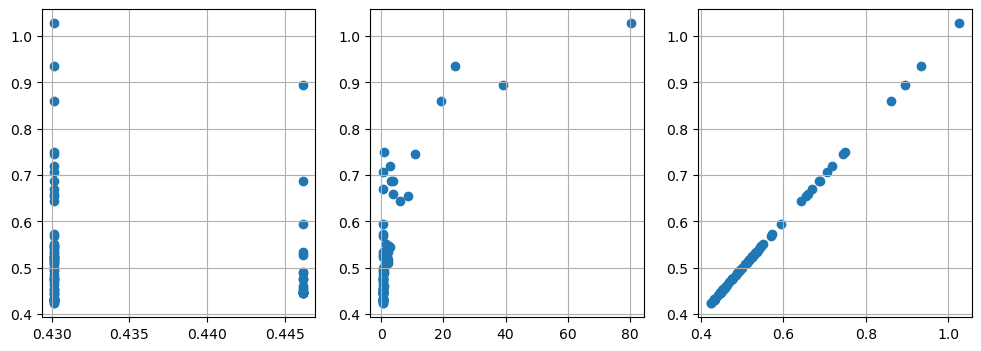

Generation 2, Trees 40, Best cost: 0.42328259, Est: 1.05820646, h: 6.498980


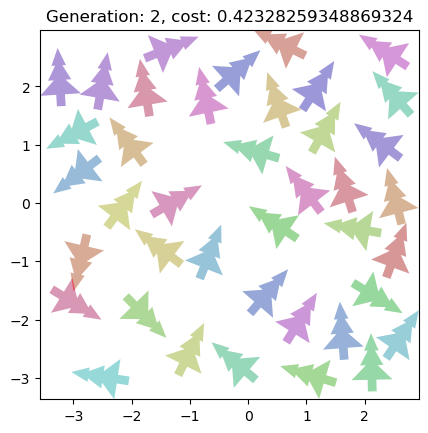

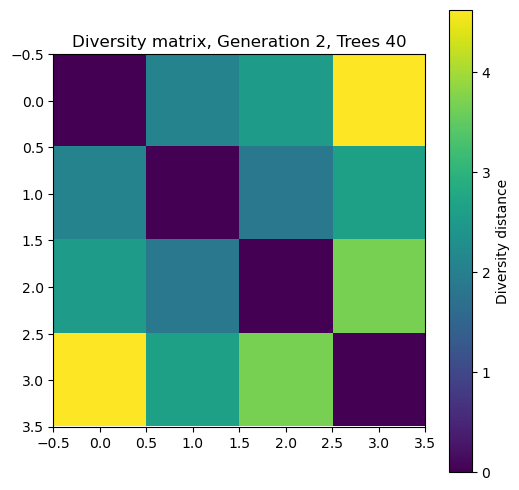

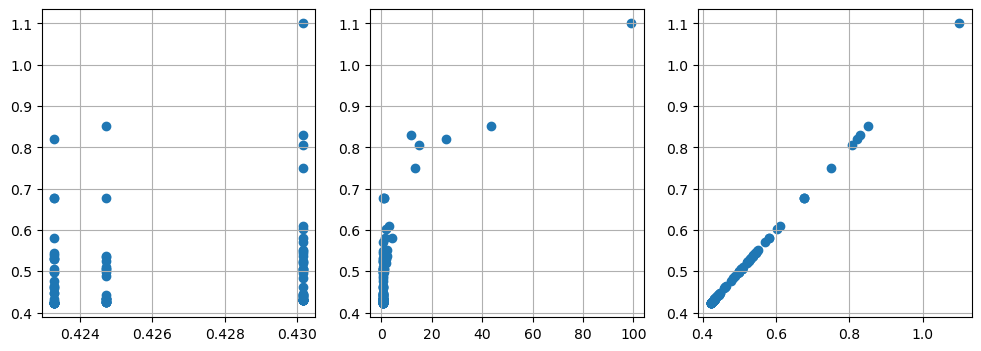

Generation 3, Trees 40, Best cost: 0.42236736, Est: 1.05591841, h: 6.498980


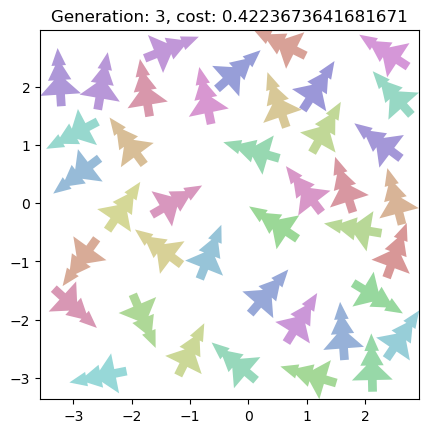

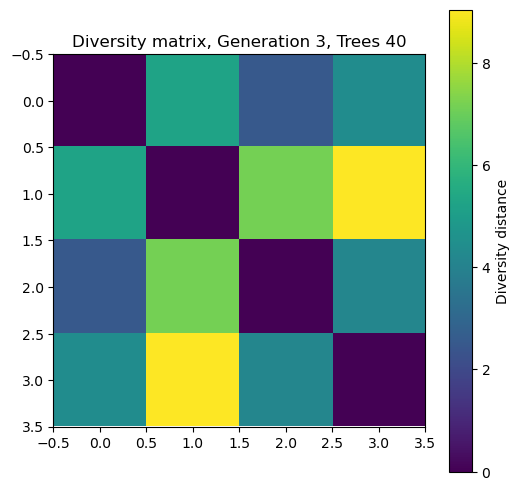

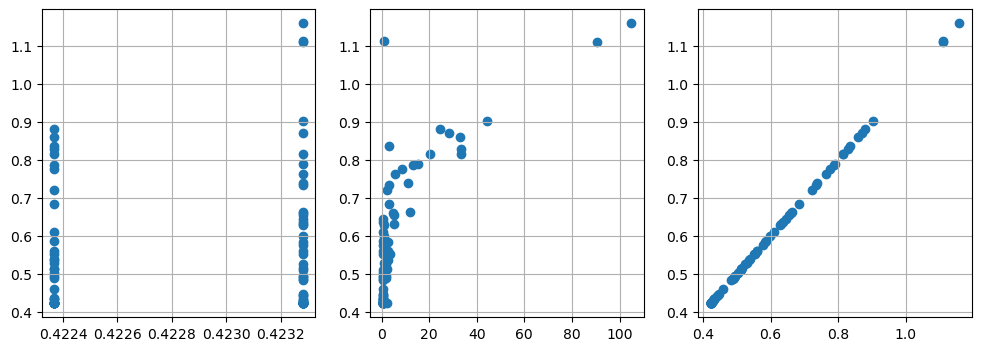

Generation 4, Trees 40, Best cost: 0.42236722, Est: 1.05591803, h: 6.498979


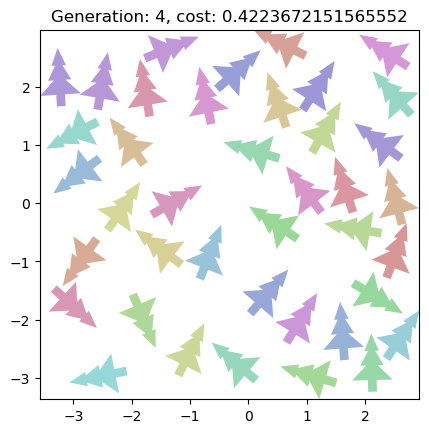

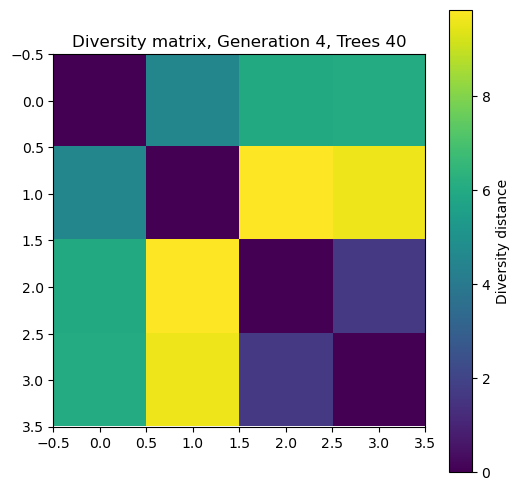

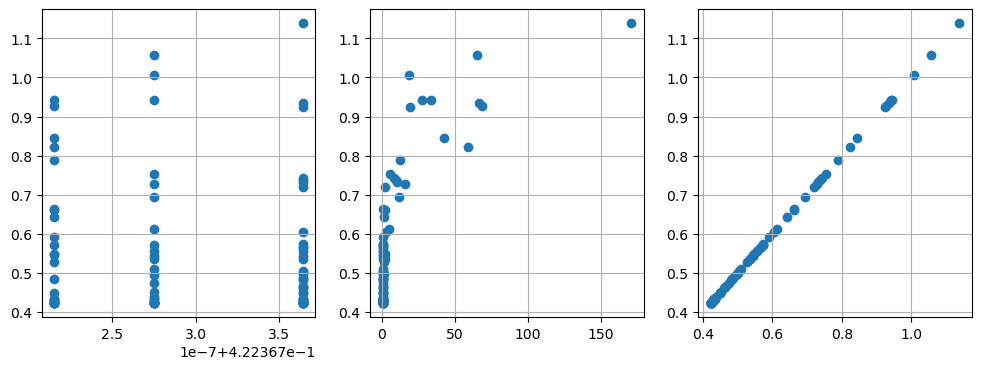

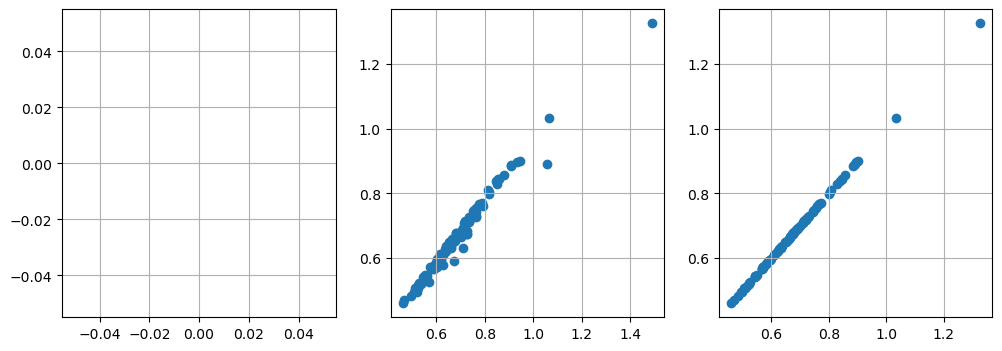

Generation 0, Trees 40, Best cost: 0.46065748, Est: 1.15164366, h: 6.571489


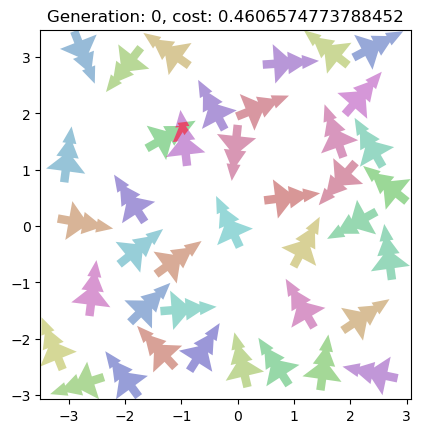

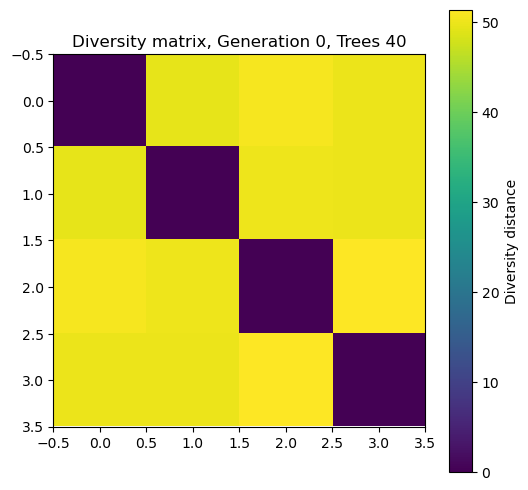

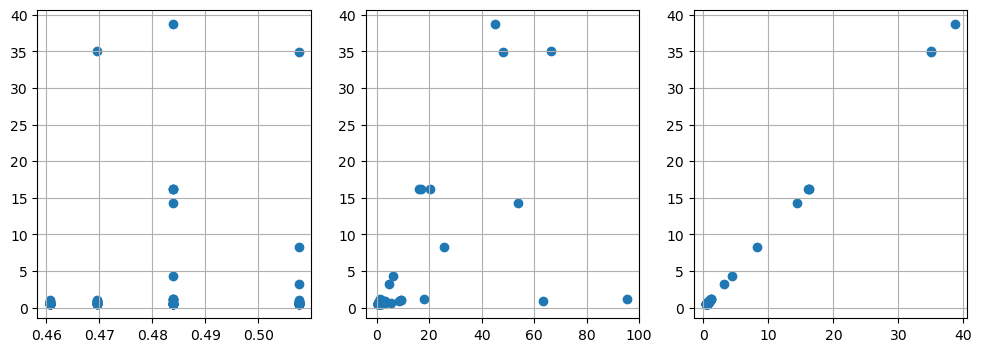

Generation 1, Trees 40, Best cost: 0.46065748, Est: 1.15164366, h: 6.571489


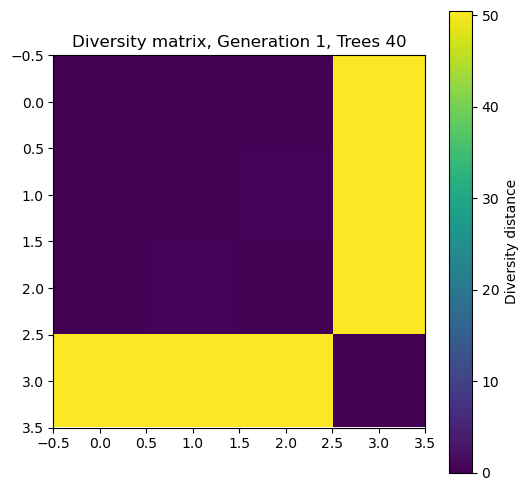

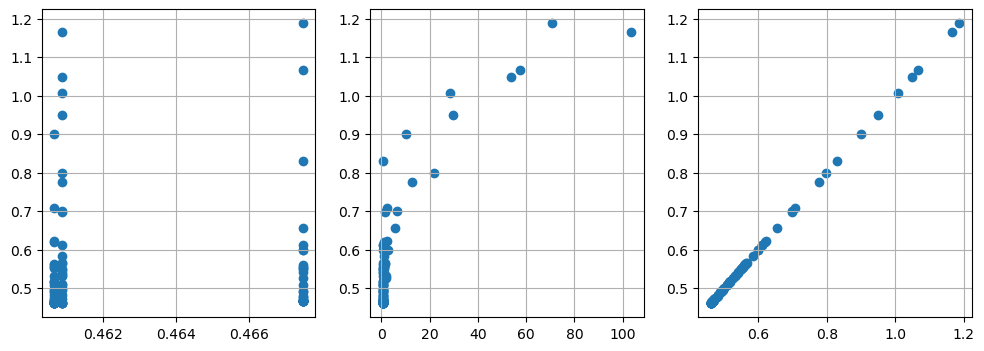

Generation 2, Trees 40, Best cost: 0.46065748, Est: 1.15164366, h: 6.571489


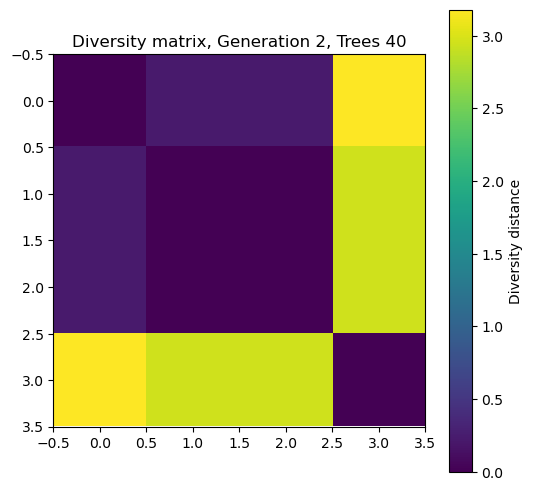

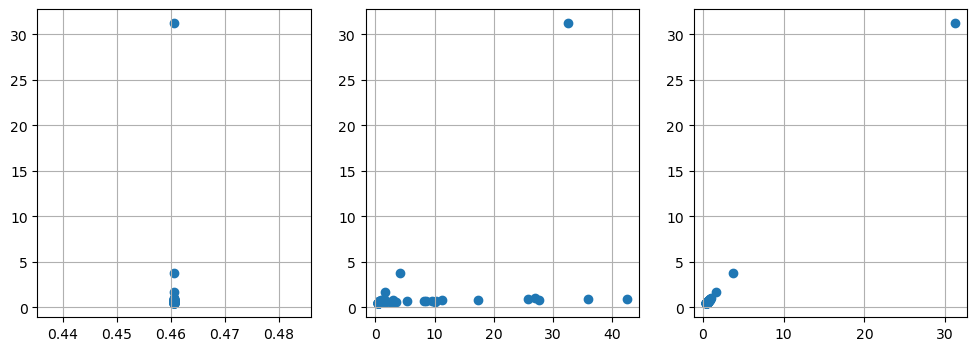

Generation 3, Trees 40, Best cost: 0.46065745, Est: 1.15164366, h: 6.571489


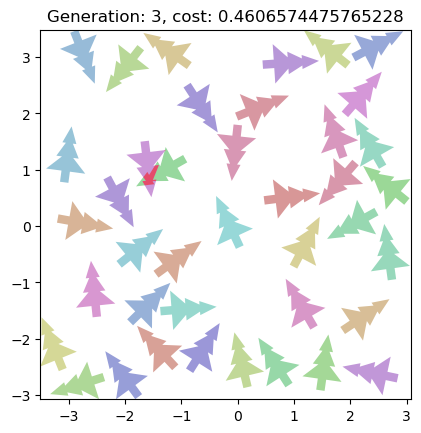

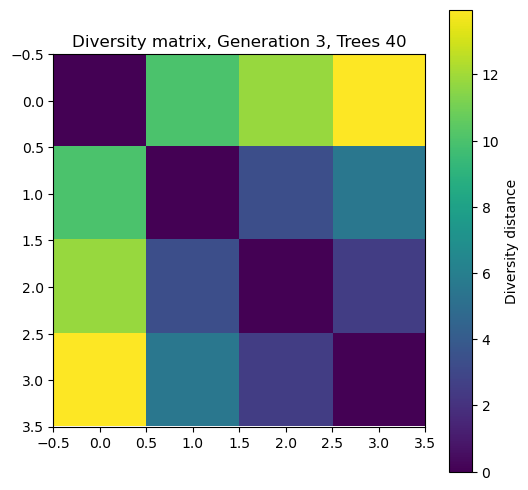

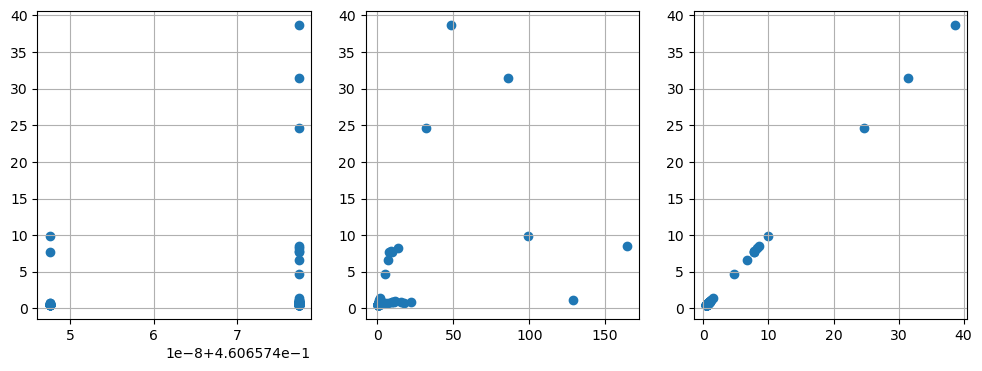

Generation 4, Trees 40, Best cost: 0.45919859, Est: 1.14799652, h: 6.560380


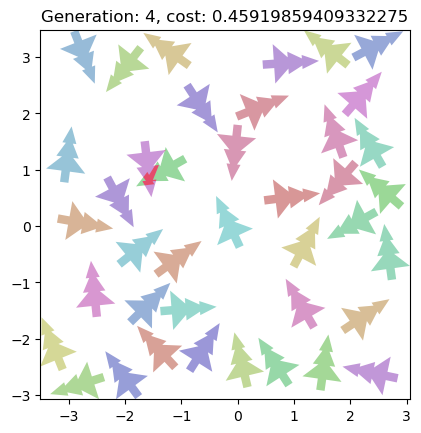

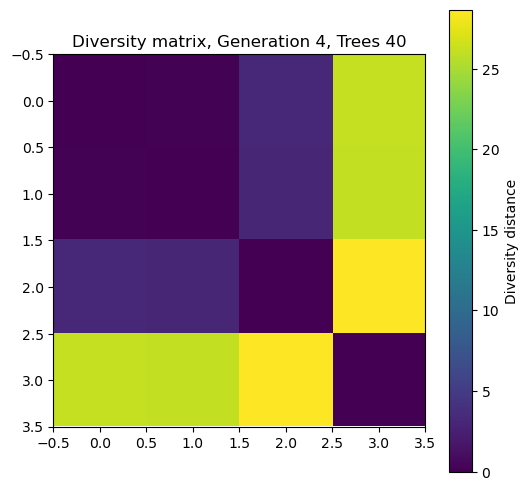

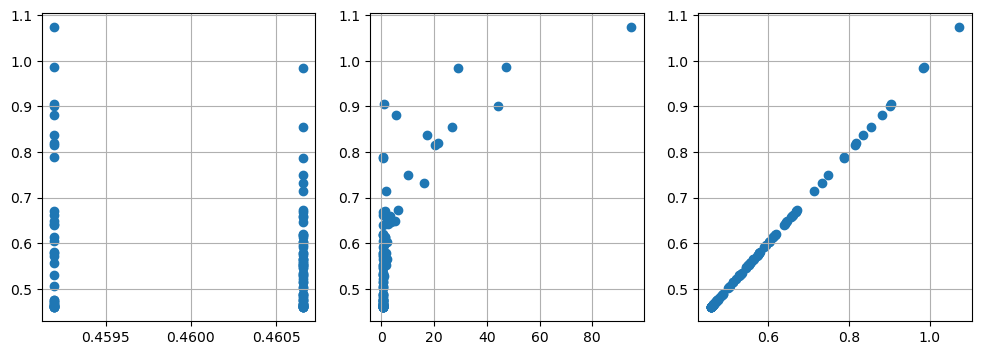

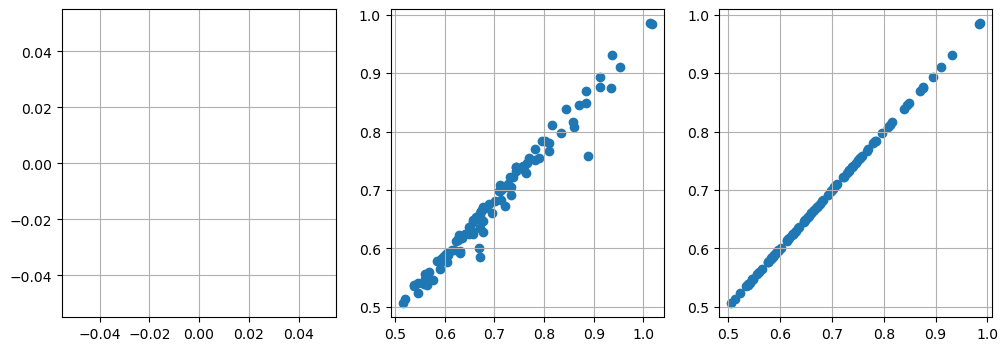

Generation 0, Trees 40, Best cost: 0.50613302, Est: 1.26533251, h: 7.114303


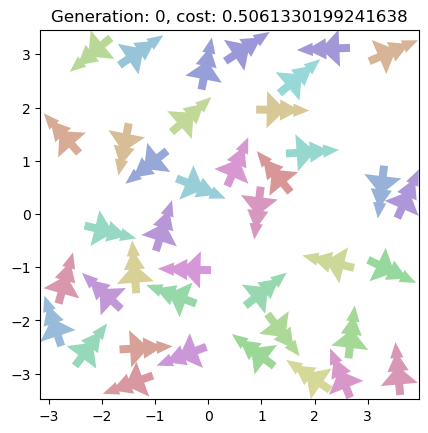

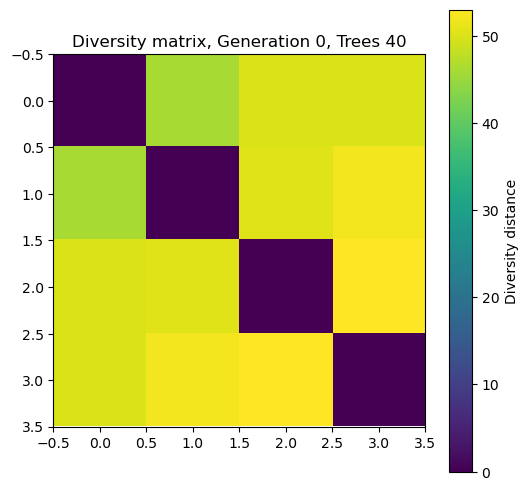

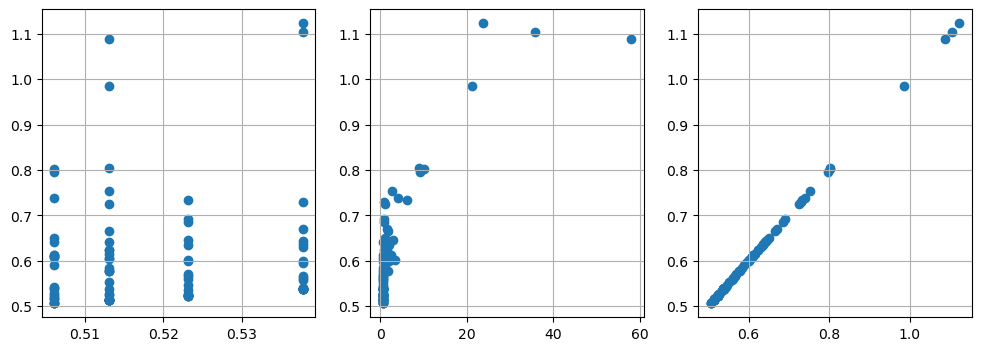

Generation 1, Trees 40, Best cost: 0.50613302, Est: 1.26533251, h: 7.114303


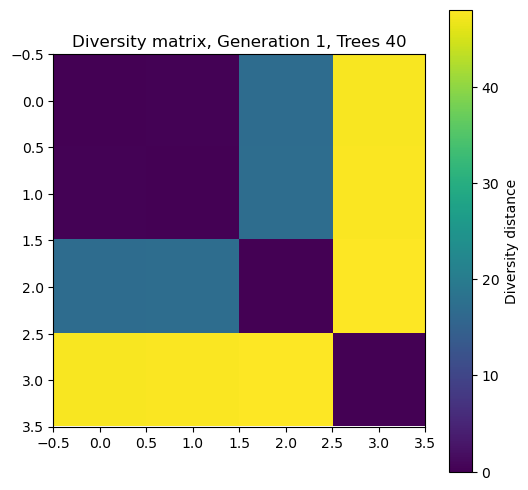

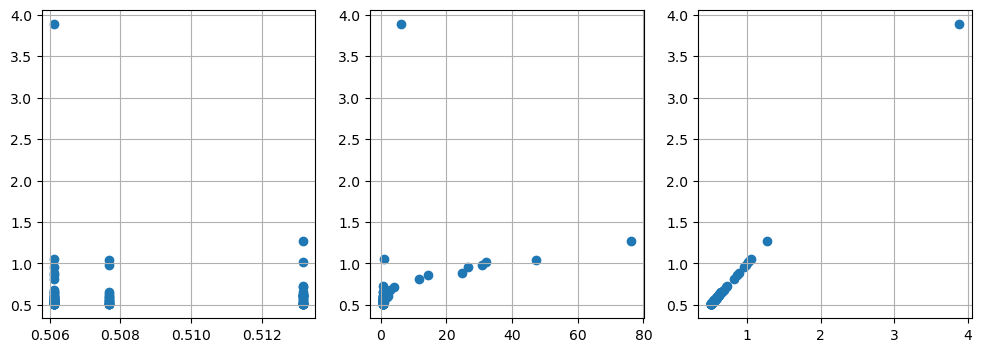

Generation 2, Trees 40, Best cost: 0.50613302, Est: 1.26533251, h: 7.114303


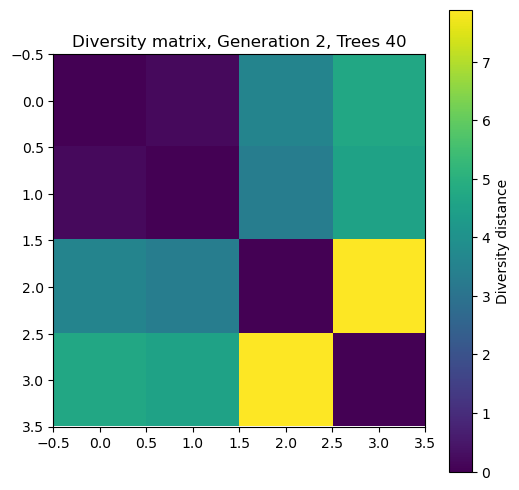

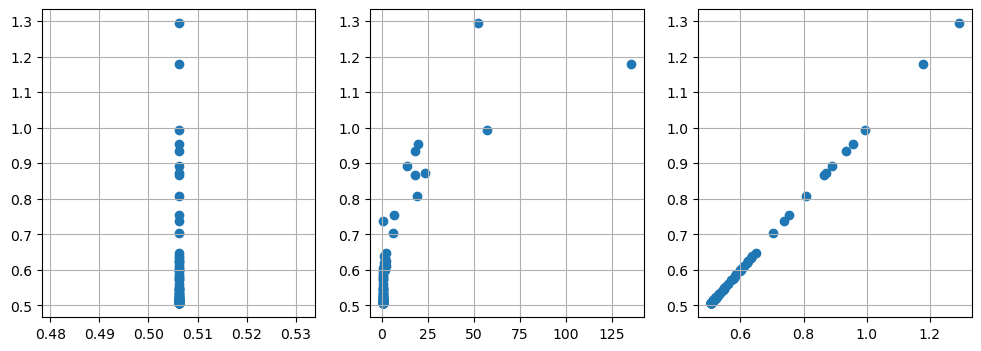

Generation 3, Trees 40, Best cost: 0.50613302, Est: 1.26533251, h: 7.114303


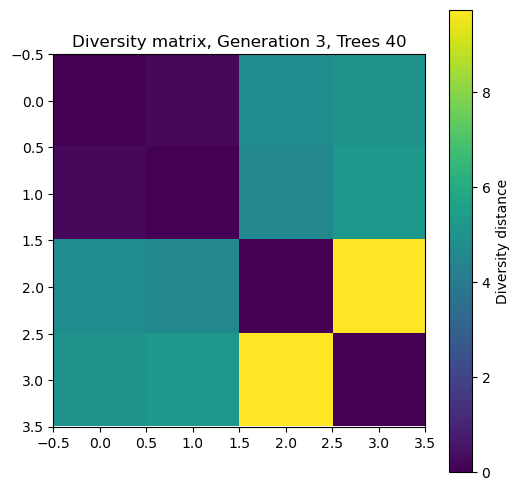

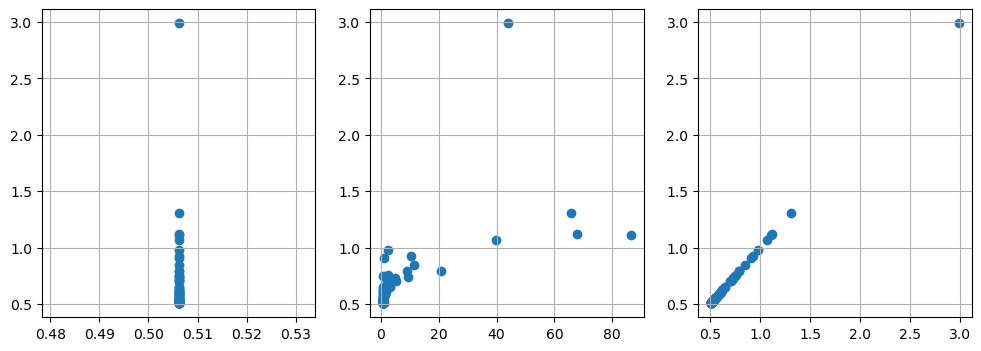

Generation 4, Trees 40, Best cost: 0.50613302, Est: 1.26533251, h: 7.114303


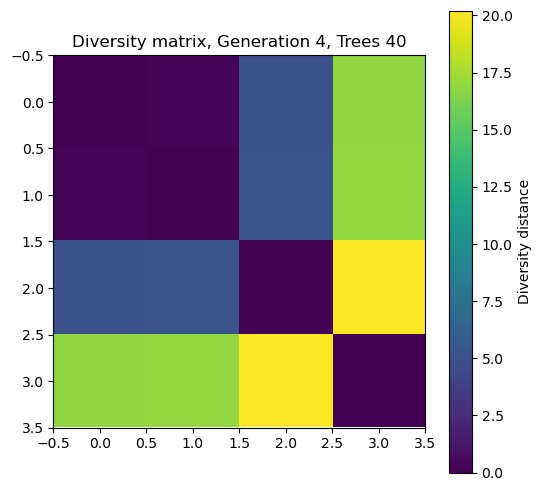

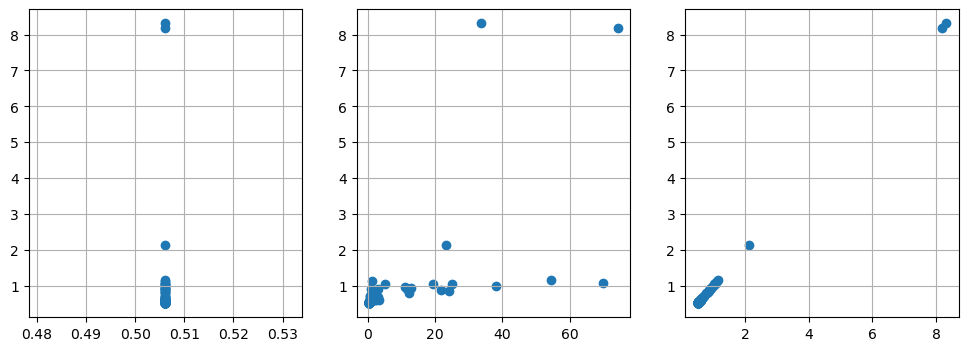

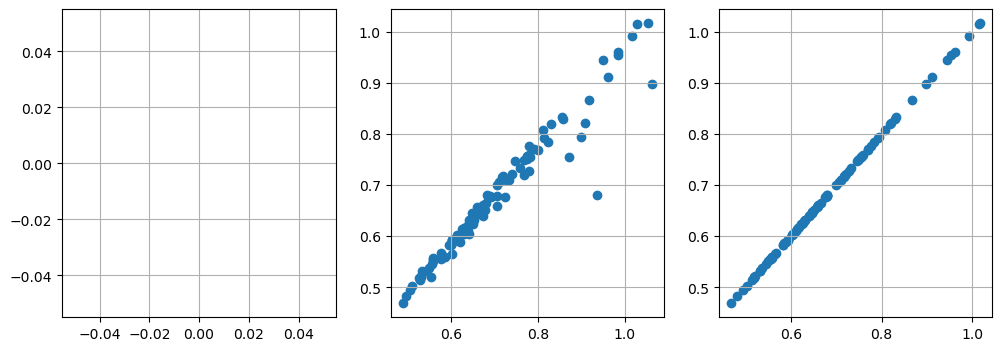

Generation 0, Trees 40, Best cost: 0.46880090, Est: 1.17200222, h: 6.846904


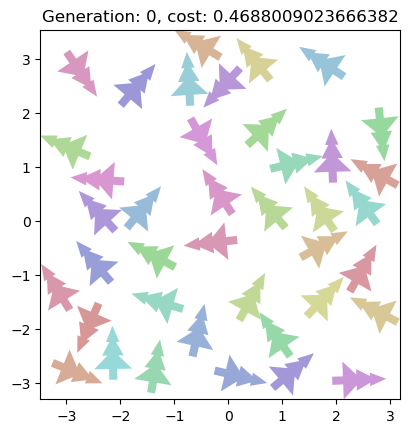

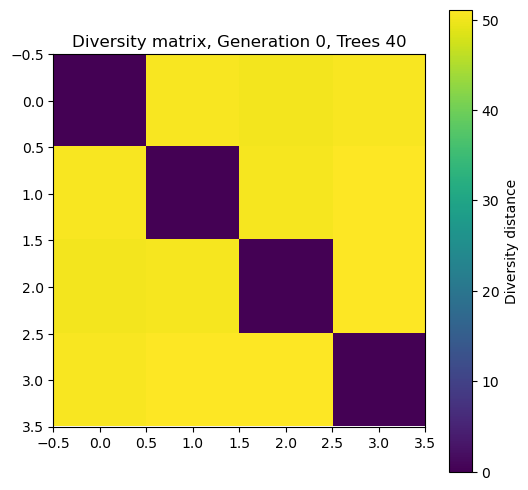

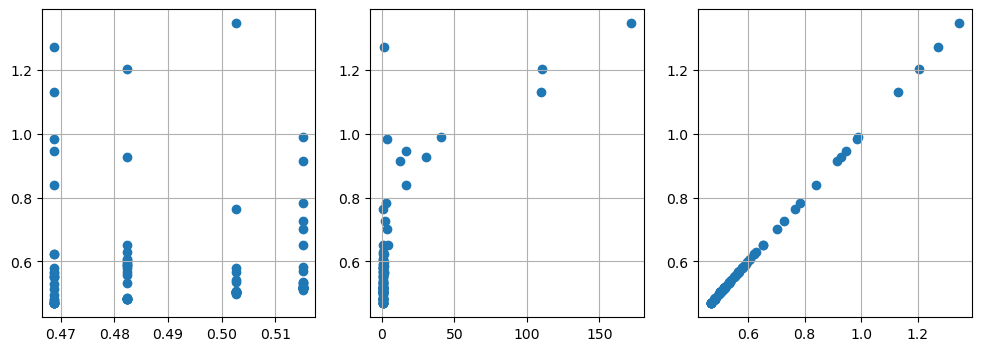

Generation 1, Trees 40, Best cost: 0.46880090, Est: 1.17200222, h: 6.846904


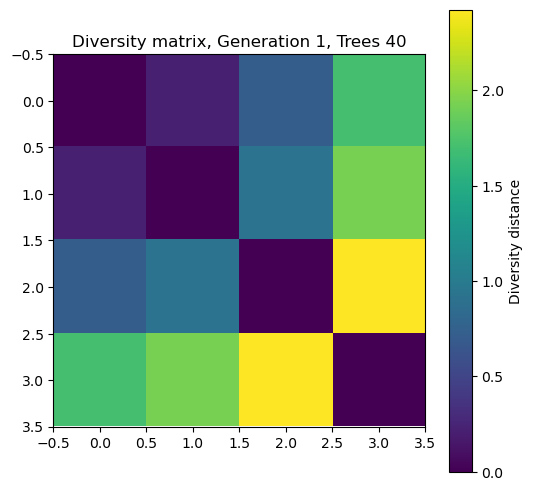

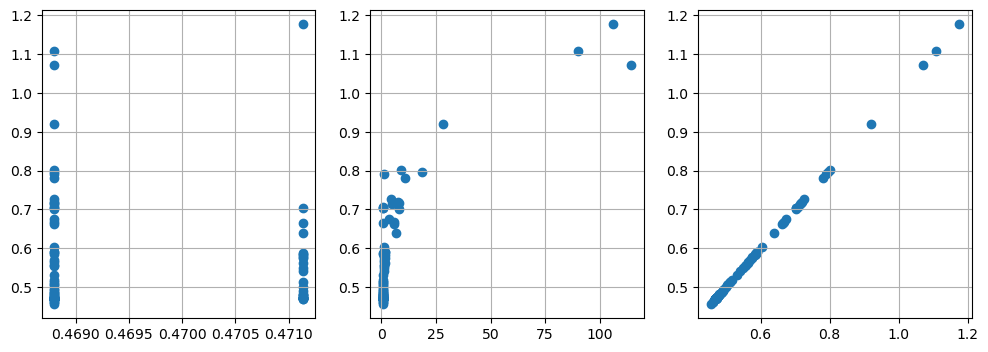

Generation 2, Trees 40, Best cost: 0.45569456, Est: 1.13923635, h: 6.750515


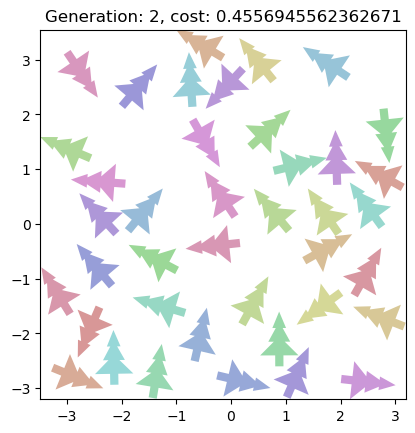

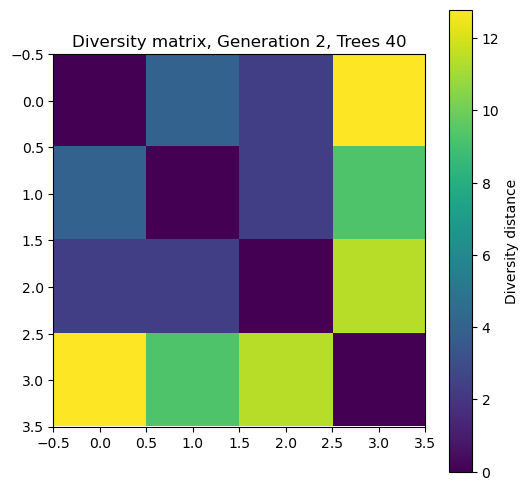

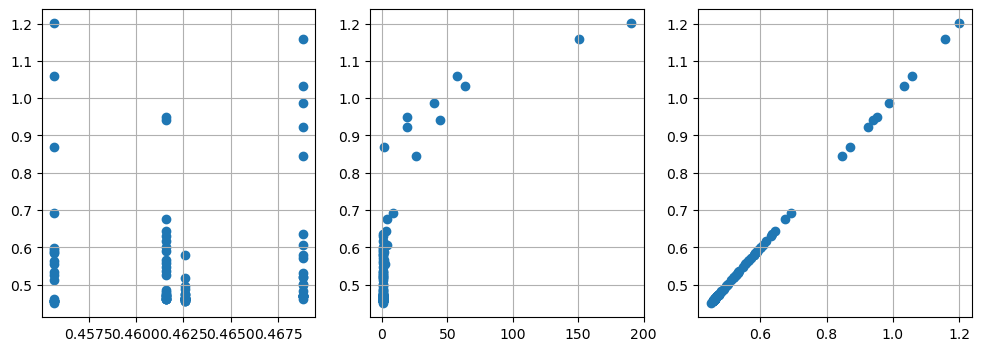

Generation 3, Trees 40, Best cost: 0.45012680, Est: 1.12531700, h: 6.675411


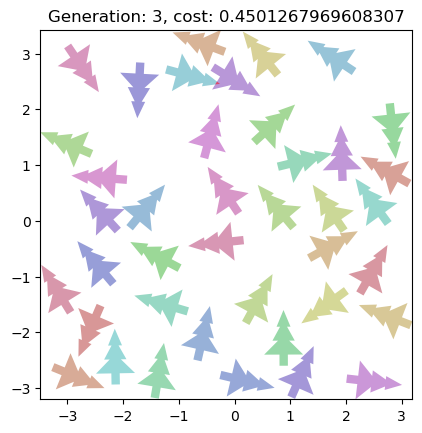

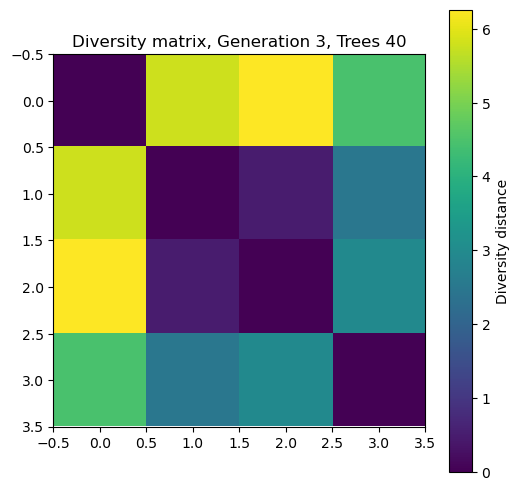

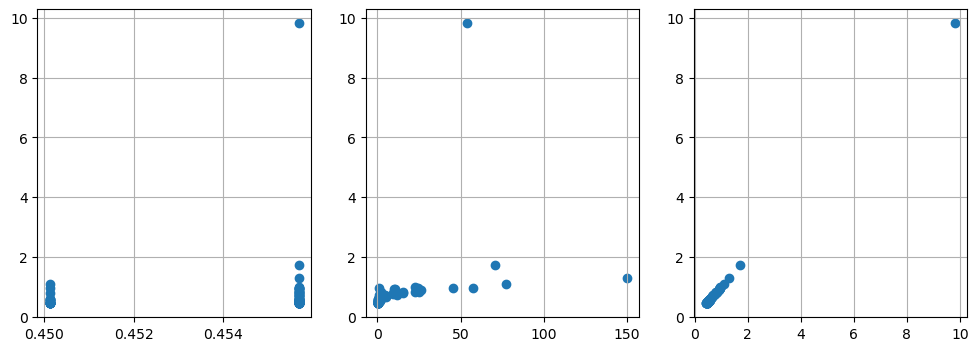

Generation 4, Trees 40, Best cost: 0.44339699, Est: 1.10849247, h: 6.654727


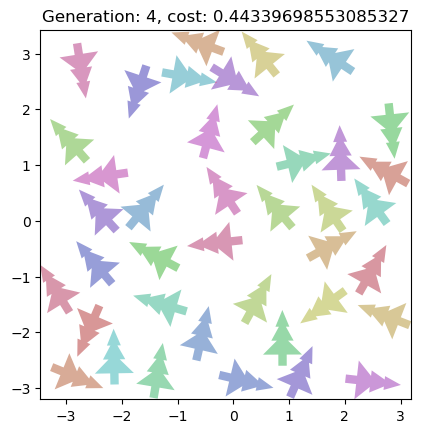

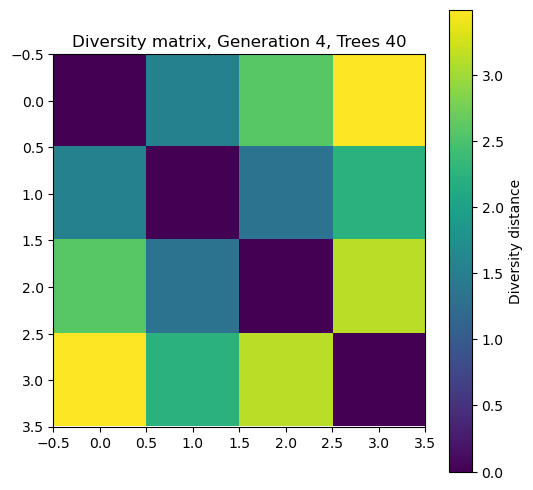

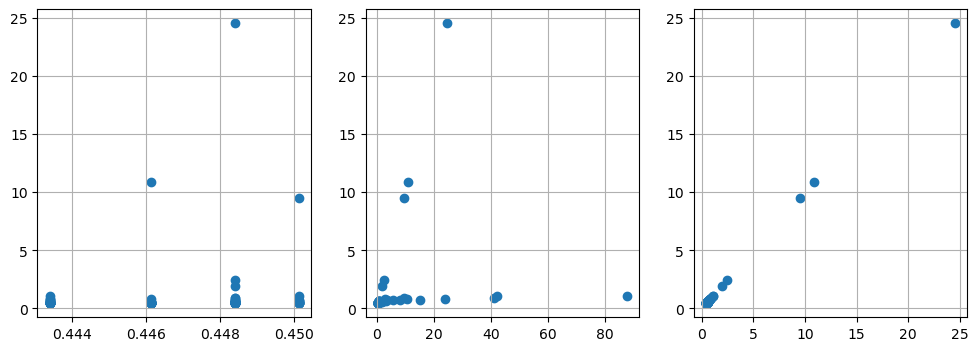

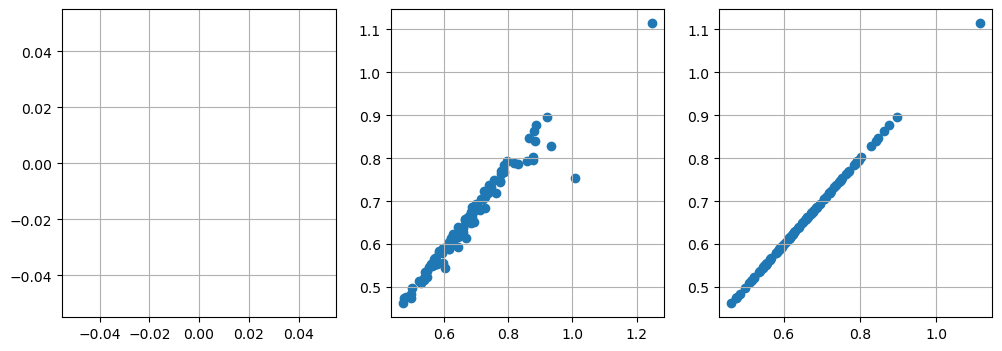

Generation 0, Trees 40, Best cost: 0.46256137, Est: 1.15640345, h: 6.801187


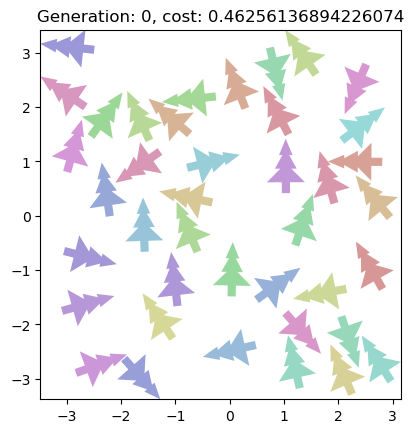

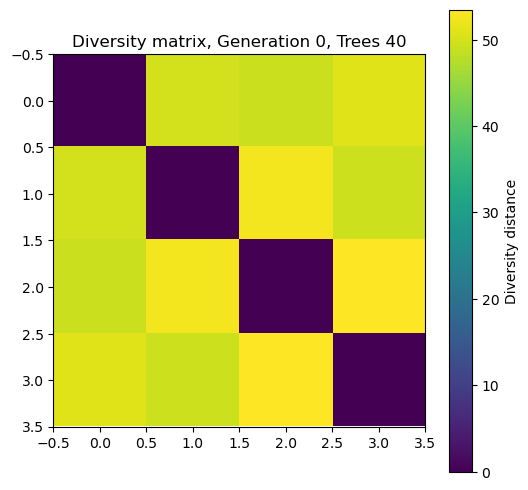

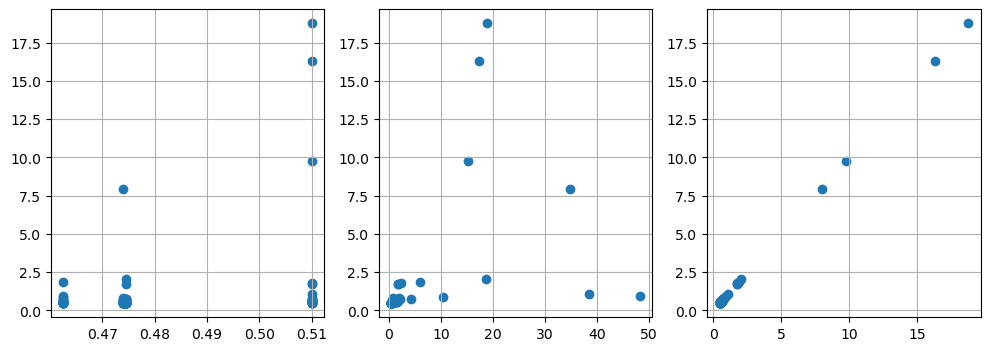

Generation 1, Trees 40, Best cost: 0.46256137, Est: 1.15640345, h: 6.801187


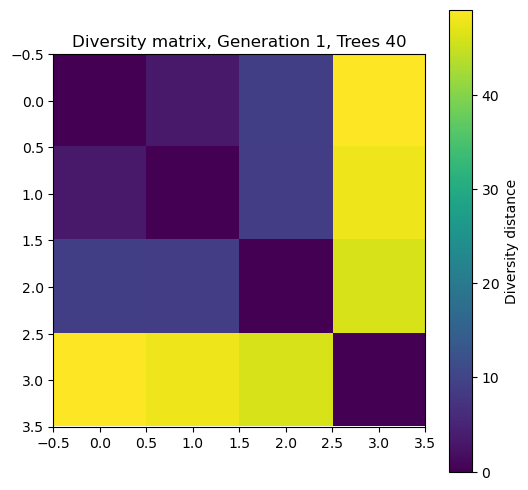

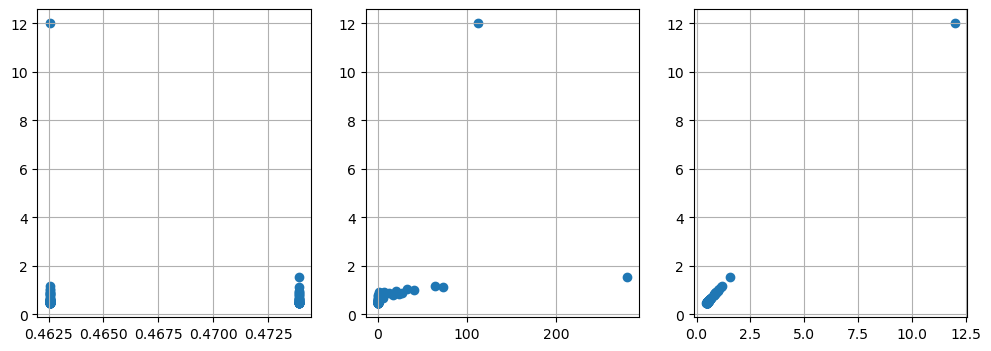

Generation 2, Trees 40, Best cost: 0.45395598, Est: 1.13488998, h: 6.737626


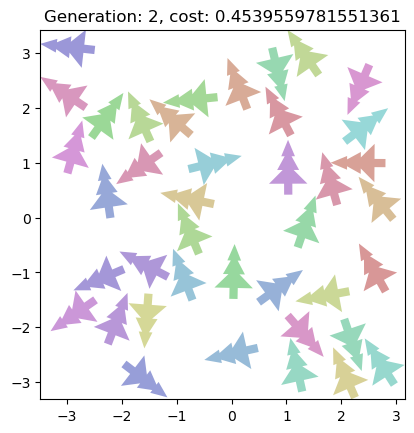

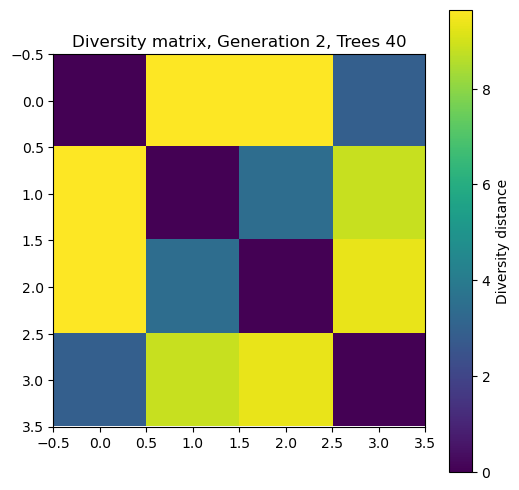

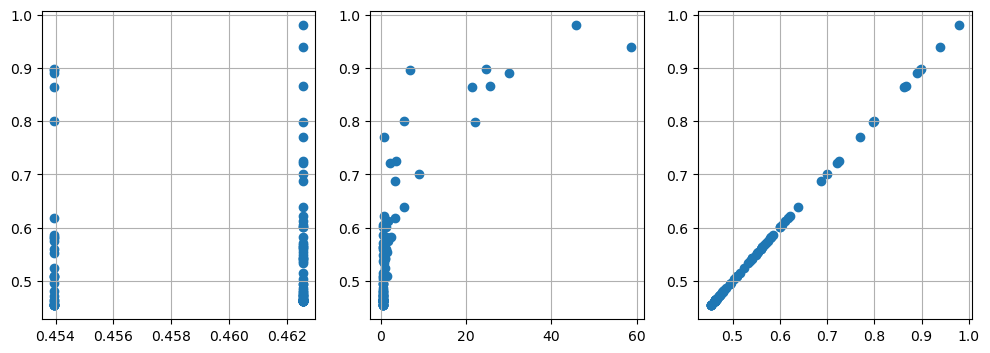

Generation 3, Trees 40, Best cost: 0.45395598, Est: 1.13488998, h: 6.737626


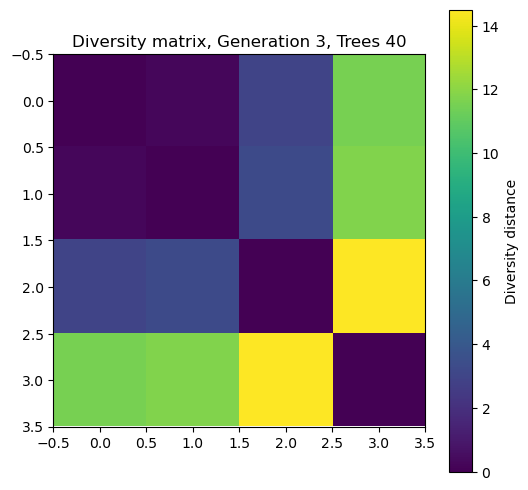

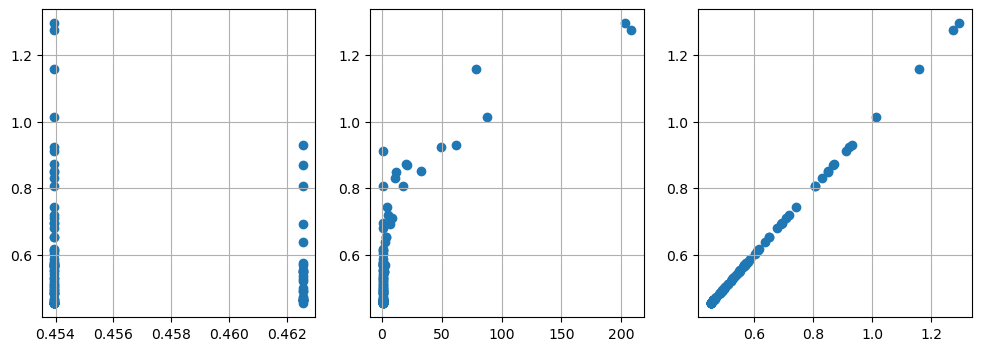

Generation 4, Trees 40, Best cost: 0.45365342, Est: 1.13413353, h: 6.734922


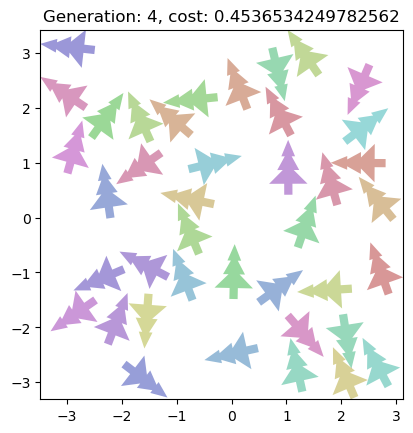

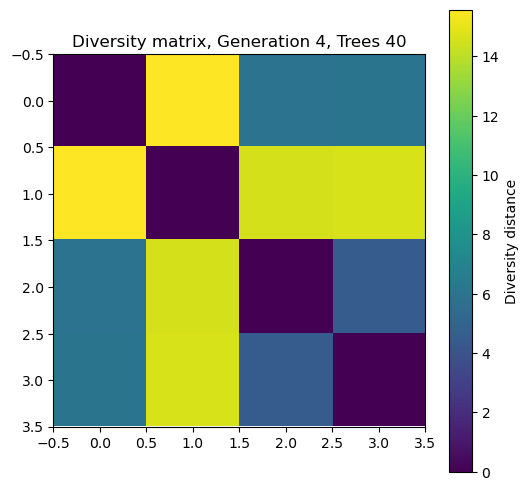

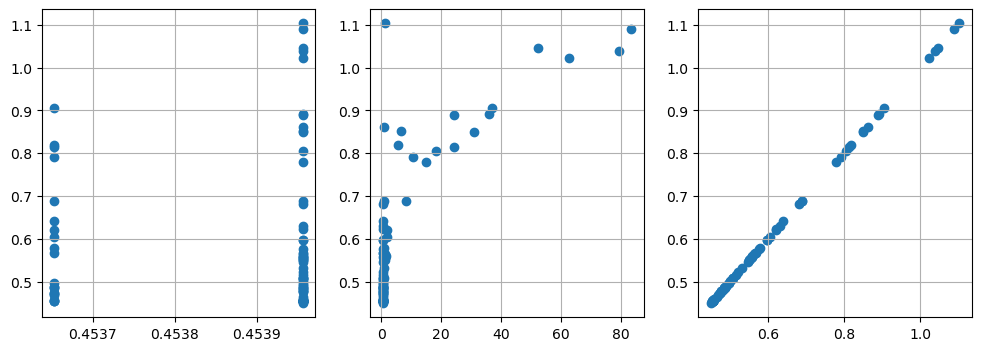

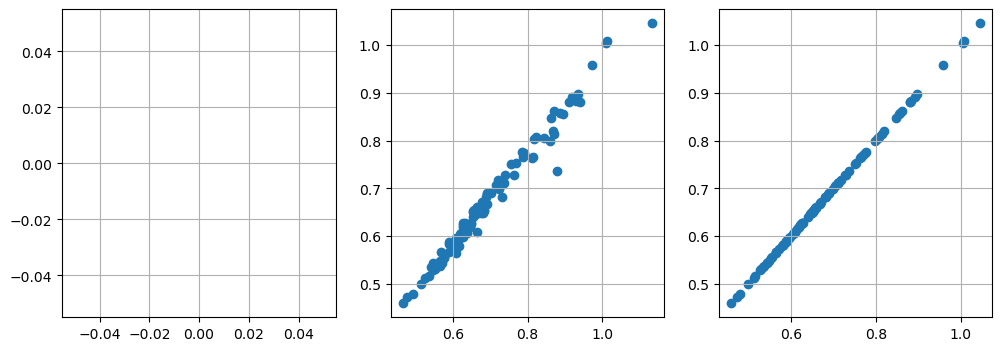

Generation 0, Trees 40, Best cost: 0.45973206, Est: 1.14933014, h: 6.780354


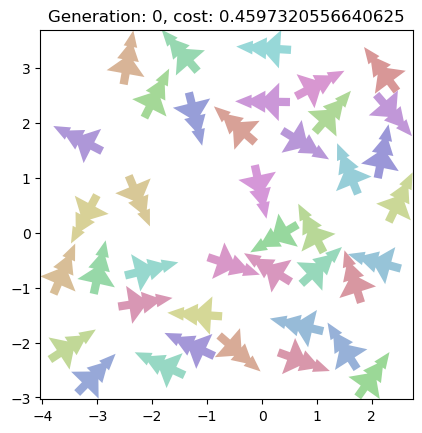

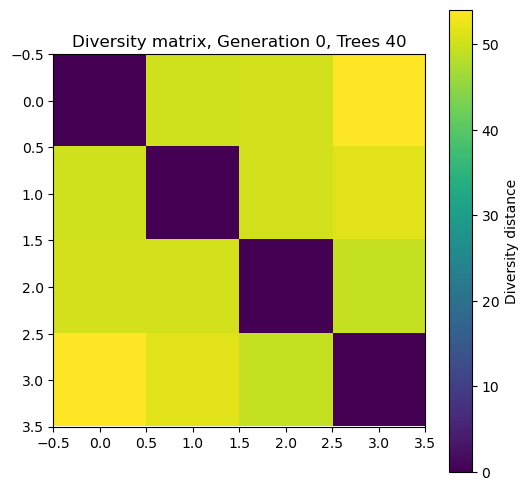

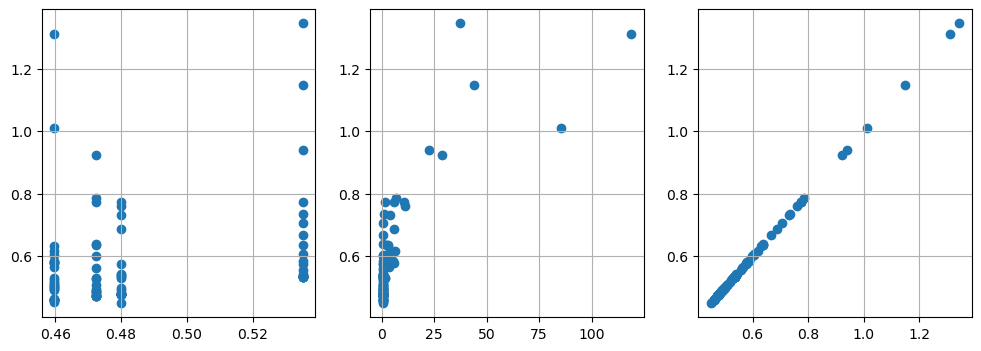

Generation 1, Trees 40, Best cost: 0.44972742, Est: 1.12431850, h: 6.706172


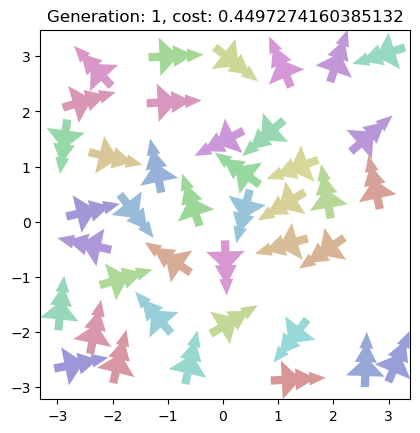

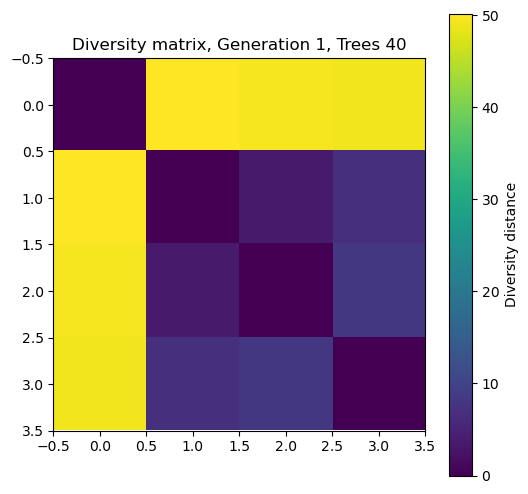

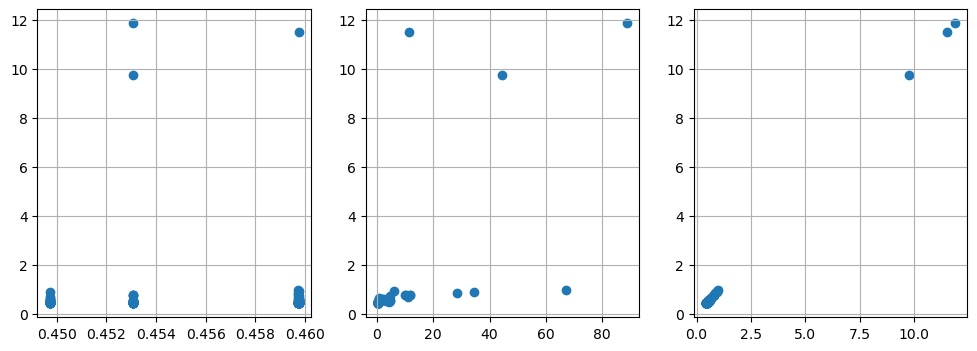

Generation 2, Trees 40, Best cost: 0.44806483, Est: 1.12016211, h: 6.693765


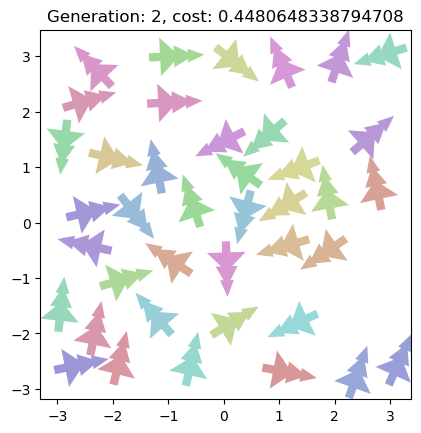

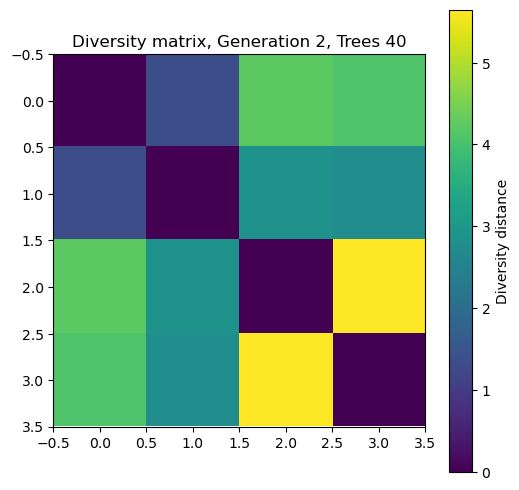

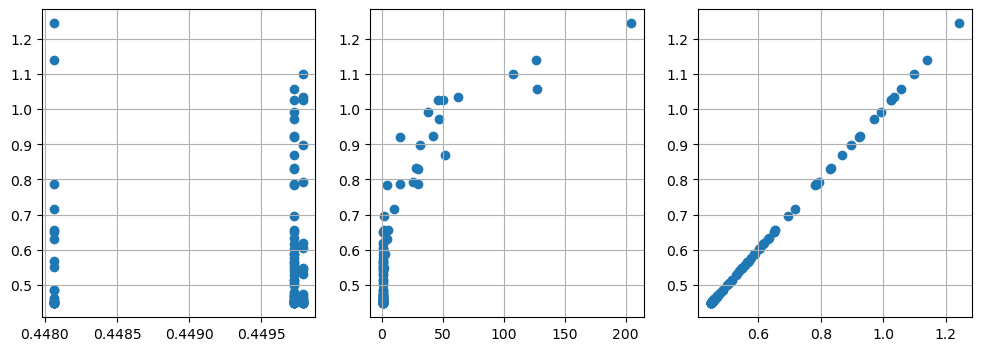

Generation 3, Trees 40, Best cost: 0.44806483, Est: 1.12016211, h: 6.693765


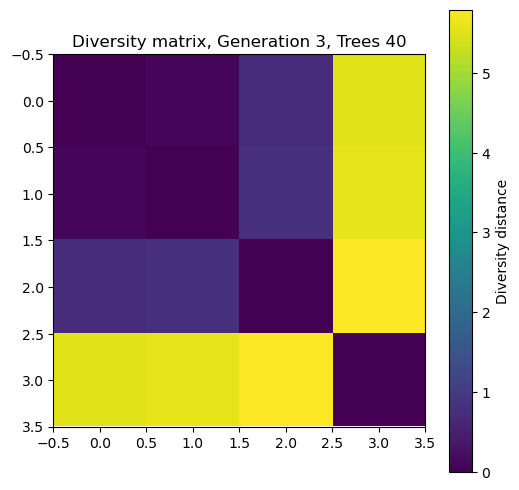

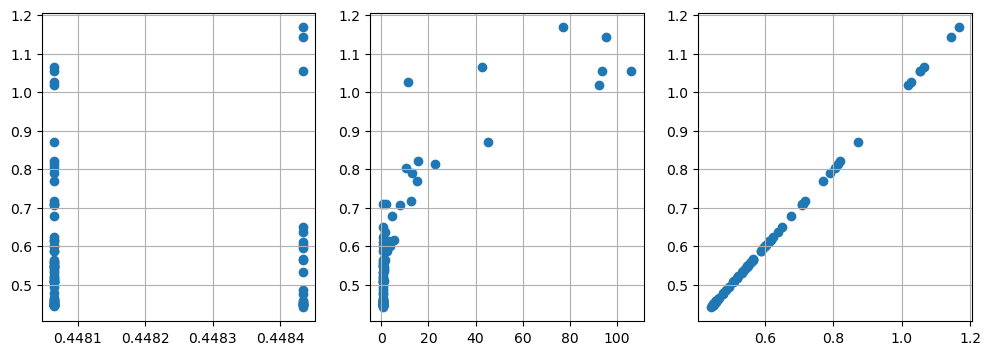

Generation 4, Trees 40, Best cost: 0.44217077, Est: 1.10542688, h: 6.649592


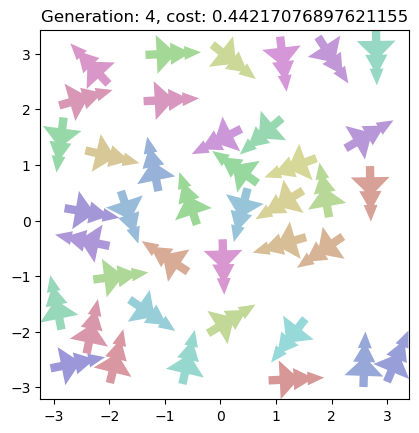

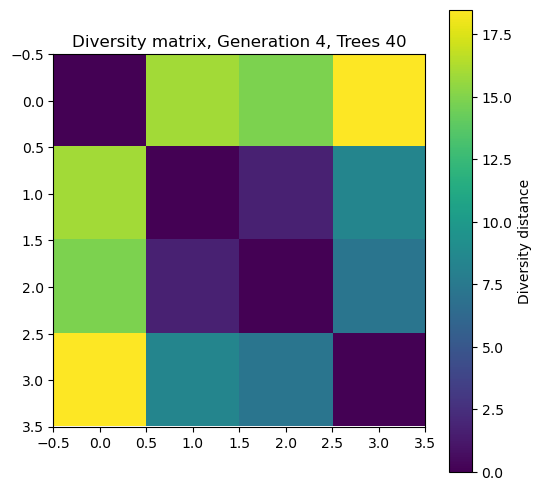

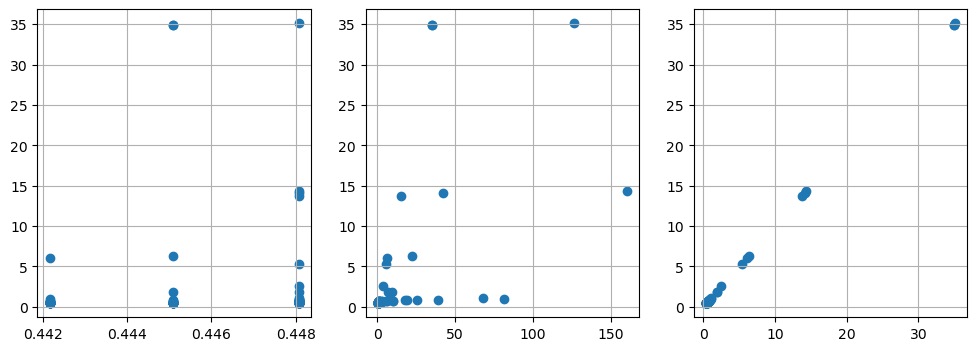

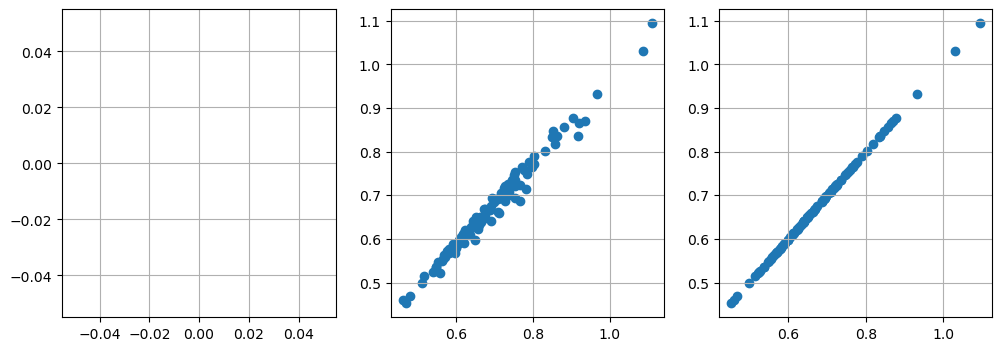

Generation 0, Trees 40, Best cost: 0.45242447, Est: 1.13106117, h: 6.726251


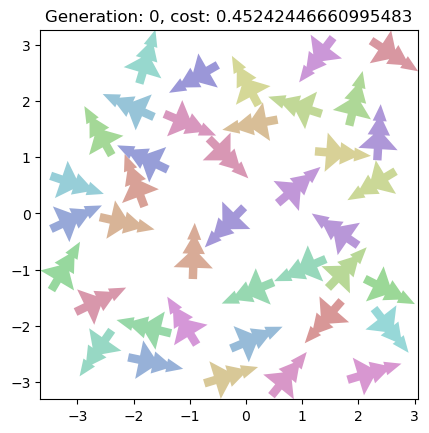

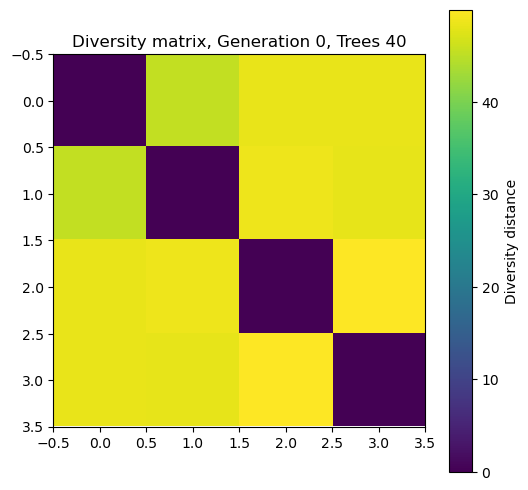

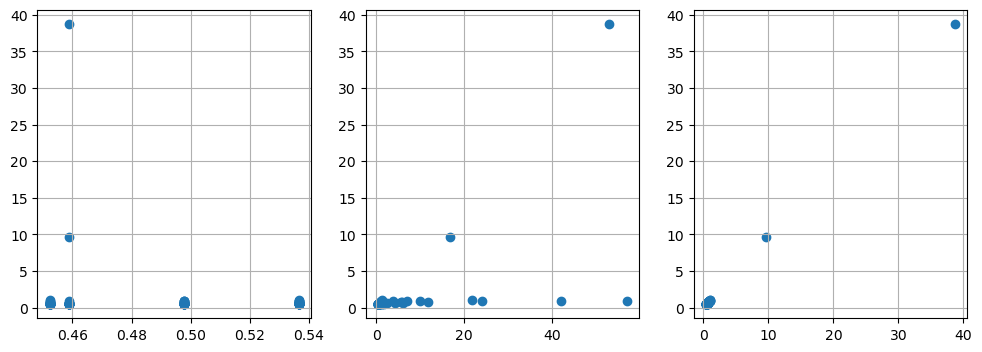

Generation 1, Trees 40, Best cost: 0.45242447, Est: 1.13106117, h: 6.726251


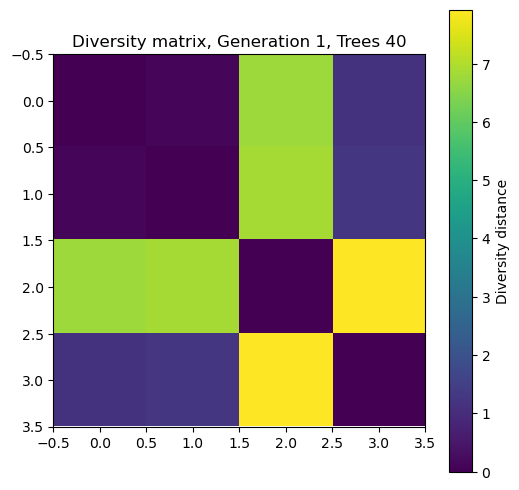

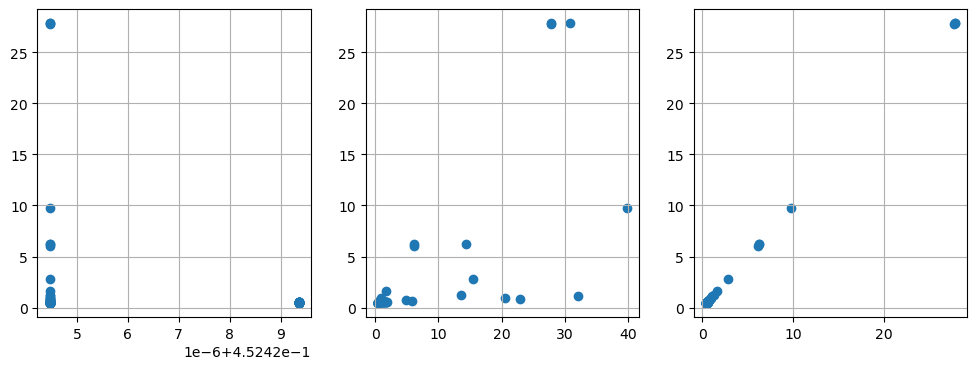

Generation 2, Trees 40, Best cost: 0.44476333, Est: 1.11190834, h: 6.669058


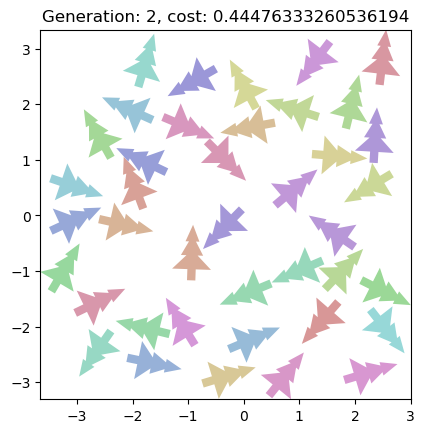

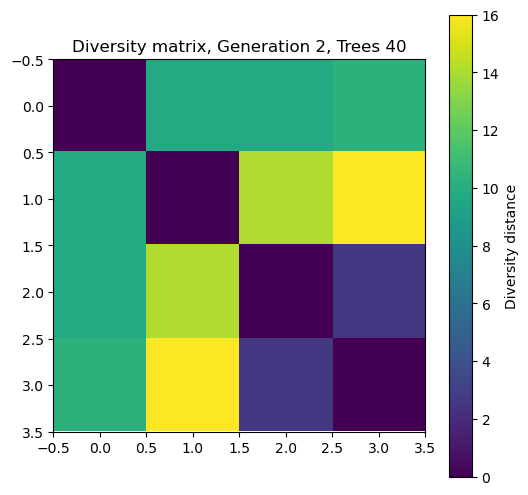

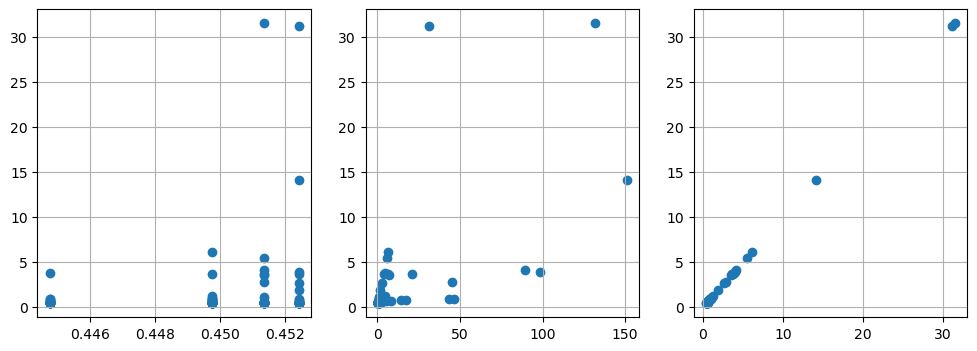

Generation 3, Trees 40, Best cost: 0.43277651, Est: 1.08194132, h: 6.578077


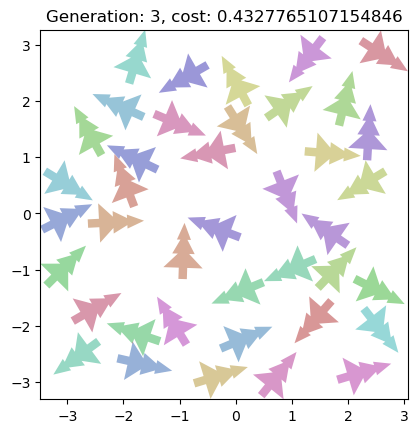

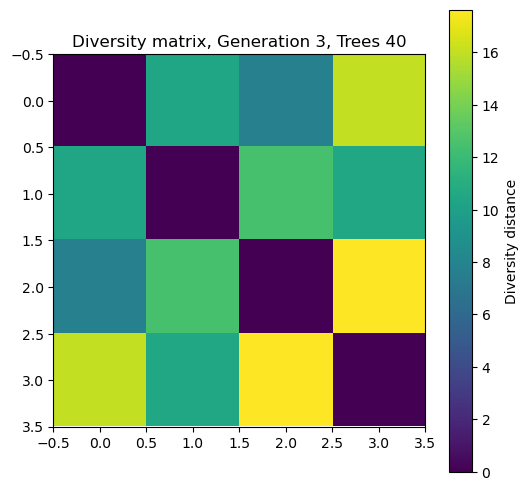

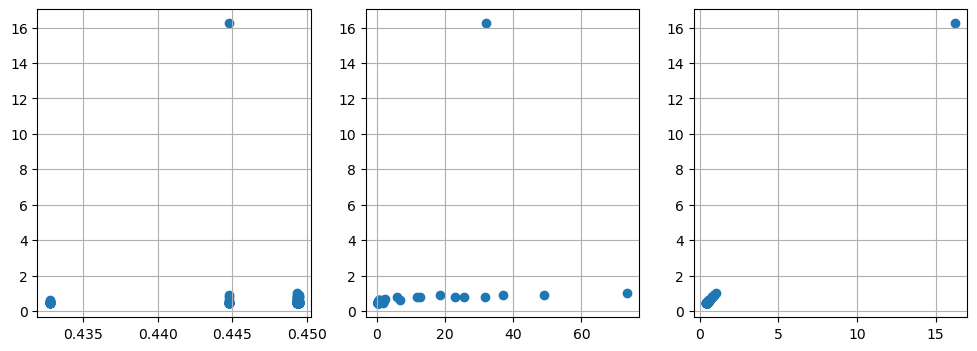

Generation 4, Trees 40, Best cost: 0.43277651, Est: 1.08194132, h: 6.578077


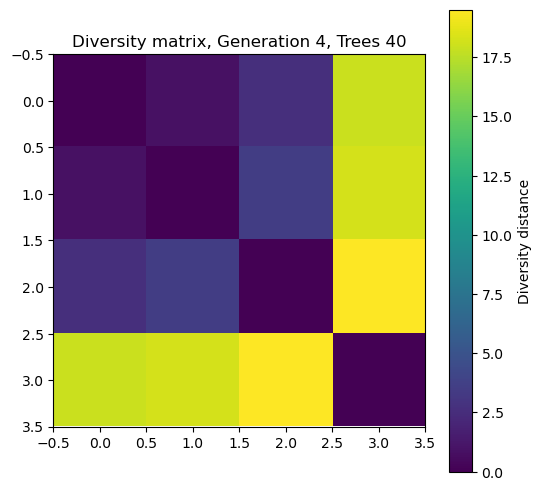

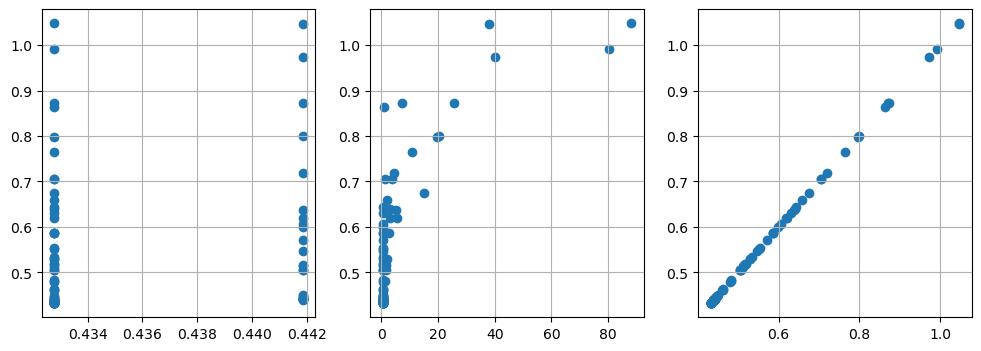

In [ ]:
importlib.reload(pack_ga)
fastMode = False
runner = pack_ga.GA()
runner.N_trees_to_do = np.array([40])
runner.plot_fitness_predictors = True
runner.plot_diversity_matrix = True
runner.n_generations = 300
if fastMode:
    runner.initializer.jiggler.duration_compact /= 10
    runner.initializer.jiggler.plot_interval = None
    runner.initializer.jiggler.n_rounds = 1    
    runner.rough_relaxers[0].n_iterations= 0
    runner.fine_relaxers = []
    runner.n_generations = 5
    runner.population_size = 100
    runner.selection_size = [1,2,5,10]
    kgs.debugging_mode = 2
kgs.profiling=False
runner.run()